# Credit Risk Analysis

Projeto desenvolvido por:
* Mariana Ramos - up201806869
* Pedro Ferreira - up201806506
* Pedro Ponte - up201809694

## Table of contents

1. [Introduction](#Introduction)

2. [Required Libraries](#Required-Libraries)

3. [The Problem Domain](#The-Problem-Domain)

4. [Step 1: Answering the question](#Step-1:-Answering-the-question)

5. [Step 2: Checking the data](#Step-2:-Checking-the-data)

6. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

7. [Step 4: Exploratory Analysis](#Step-4:-Exploratory-Analysis)

9. [Step 5: Classification](#Step-5:-Classification)

    - [5.1: Decision Trees](#5.1:-Decision-Trees)
        
        - [5.1.1: Cross Validation](#5.1.1:-Cross-Validation)

        - [5.1.2: Parameter Tuning](#5.1.2:-Parameter-Tuning)
    
    - [5.2: K-Nearest Neighbor](#5.2:-K-Nearest-Neighbor)

## Introduction

[[ go back to the top ]](#Table-of-contents)

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## The Problem Domain

[[ go back to the top ]](#Table-of-contents)

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to design a predictive model in order to evaluate the credit risk of a given loan and decide whether the loan should be granted or not.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified loans — to quantify how well our model is performing. The accuracy achieved should be, at least, 

>Did you understand the context for the question and the scientific or business application?

TODO

>Did you record the experimental design?

TODO

>Did you consider whether the question could be answered with the available data?

TODO

<hr />

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

In order to be able to make conclusions and reach our goal, we will need to extract and study the data. To do so, we have to import the panda library and extract the information to be stored in a variable so we can work with it. 

In [71]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

credit_data = pd.read_csv('data.csv', low_memory=False)

In [72]:
# data frame shape
print('Number of rows: ', credit_data.shape[0])
print('Number of columns: ', credit_data.shape[1])

Number of rows:  855969
Number of columns:  73


As we can see the data file has a total of 855969 different results and a total of 73 evaluation criteria. The second parameter of the read_csv function makes all the empty fields be filled with NA so we can easily analyse missing values in the future.

We can start by reading the data into a pandas DataFrame to see if is everything alright.

In [73]:
credit_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [74]:
credit_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000,20000,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [75]:
credit_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


Let's examine the structure of the data set.

In [76]:
# all data frame columns
credit_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [77]:
# data frame summary
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

We can see that some features have missing values. Let's take a closer look at them.

In [78]:
# percentage of missing values per feature
print((credit_data.isnull().sum() * 100 / credit_data.shape[0]).sort_values(ascending=False))

verification_status_joint    99.948363
annual_inc_joint             99.948363
dti_joint                    99.948363
il_util                      98.643759
mths_since_rcnt_il           98.488964
                               ...    
pub_rec                       0.000000
open_acc                      0.000000
inq_last_6mths                0.000000
earliest_cr_line              0.000000
id                            0.000000
Length: 73, dtype: float64


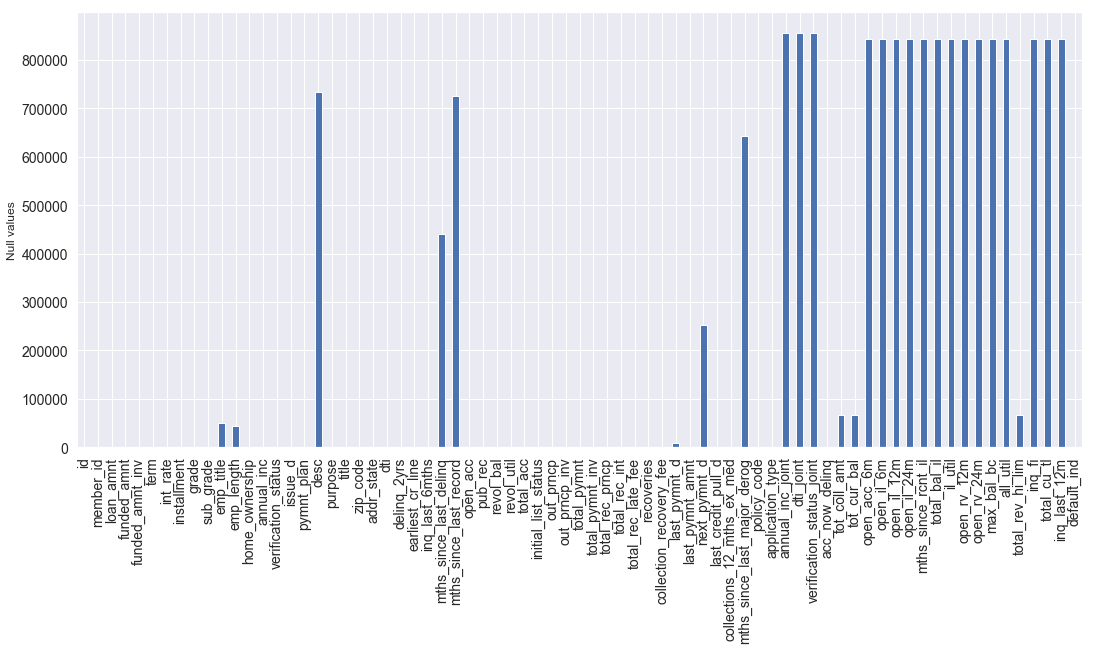

In [79]:
credit_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
plt.ylabel('Null values');

## Step 3: Tidying the data
[[ go back to the top ]](#Table-of-contents)

Looking to all features and the respective percentage of missing values, we can conclude that some of them (like *verification_status_joint*, *annual_inc_joint*, *dti_joint*, *il_util*, *mths_since_rcnt_il*, *total_bal_il*, *inq_last_12m*, *open_acc_6m*, *open_il_6m*, *open_il_24m*, *open_il_12m*, *open_rv_12m*, *open_rv_24m*, *max_bal_bc*, *all_util*, *inq_fi*, *total_cu_tl* have almost all entries missing. As this feature is not crucial for the project, we are dropping it. 

In [80]:
# drop the columns
credit_data.drop(['verification_status_joint', 'annual_inc_joint', 'dti_joint', 'il_util', 'mths_since_rcnt_il',
                   'total_bal_il', 'inq_last_12m', 'open_acc_6m', 'open_il_6m', 'open_il_24m', 'open_il_12m', 'open_rv_12m',
                   'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl'], axis=1, inplace=True)

Now, let's examine the number of unique values for each feature.

In [81]:
# number of unique observations per column
credit_data.nunique().sort_values()

policy_code                         1
default_ind                         2
application_type                    2
term                                2
pymnt_plan                          2
initial_list_status                 2
next_pymnt_d                        3
verification_status                 3
home_ownership                      6
grade                               7
acc_now_delinq                      8
inq_last_6mths                      9
emp_length                         11
collections_12_mths_ex_med         12
purpose                            14
delinq_2yrs                        29
pub_rec                            31
sub_grade                          35
addr_state                         51
open_acc                           77
last_pymnt_d                       97
last_credit_pull_d                102
issue_d                           103
mths_since_last_record            123
total_acc                         134
mths_since_last_delinq            155
mths_since_l

The feature *policy_code* only has one value, so we can conclude that this one is not important for our analysis and we can also drop this collumn.

In [82]:
# drop the column "policy_code"
credit_data.drop('policy_code', axis=1, inplace=True)

*id* and *member_id* features are randomly generated fields by bank for unique identification purposes only, so we can drop them.

In [83]:
# drop the columns "id" and "member_id"
credit_data.drop(['id', 'member_id'], axis=1, inplace=True)

Features like *funded_amnt*, *funded_amnt_inv*, *mths_since_last_record*, *out_prncp*, *out_prncp_inv*, *total_pymnt*, *total_pymnt_inv*, *total_rec_prncp*, *total_rec_int*, *total_rec_late_fee*, *recoveries*, *collection_recovery_fee*, *last_pymnt_d*, *last_pymnt_amnt*, *next_pymnt_d* can be dropped because they leak data from future, after the loan has already started to be funded. 

In [84]:
# drop columns
credit_data.drop(['funded_amnt', 'funded_amnt_inv', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
                   'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                   'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'], axis=1, inplace=True)

*emp_title* feature requires other data and a lot of processing to become potentially useful, so we opt to drop that one too.

In [85]:
# drop "emp_title" column
credit_data.drop('emp_title', axis=1, inplace=True)

Also *desc*, *initial_list_status*, *total_rev_hi_lim* features doesn't add value to our model, so we will drop them.

In [86]:
# drop "desc", "initial_list_status", "total_rev_hi_lim" columns
credit_data.drop(['desc', 'initial_list_status', 'total_rev_hi_lim'], axis=1, inplace=True)

*zip_code* feature is mostly redundant since only the first 3 digits of the 5 digit zip code are visible.

In [87]:
# drop "zip_code" column
credit_data.drop('zip_code', axis=1, inplace=True)

*addr_state* collumn seems like to contain categorical values. Let's explore the unique value counts of this column.

In [88]:
print(credit_data['addr_state'].value_counts())

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64


The *addr_state* column contains too many unique values, so it’s better to drop this.

In [89]:
# drop "addr_state" column
credit_data.drop('addr_state', axis=1, inplace=True)

Let's look at *pymnt_plan* feature values.

In [90]:
print(credit_data['pymnt_plan'].value_counts())

n    855964
y         5
Name: pymnt_plan, dtype: int64


It seems that this column has two unique values, *y* and *n*, with *y* occurring only 5 times. Let’s drop this column:

In [91]:
# drop "pymnt_plan" column
credit_data.drop('pymnt_plan', axis=1, inplace=True)

Let's also look at *application_type* column.

In [92]:
print(credit_data['application_type'].value_counts())

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


It seems that this column only has two unique values, *INDIVIDUAL* and *JOINT*, with *JOINT* occurring only 442 times. Let's drop this column too:

In [93]:
# drop "application_type" column
credit_data.drop('application_type', axis=1, inplace=True)

Next, let’s look at the unique value counts for the *purpose* and *title* columns to understand which columns we want to keep.

In [94]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(credit_data[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64 

Unique Values in column: title

Debt consolidation                     398089
Credit card refinancing                159228
Home improvement                        38633
Other                                   30522
Debt Consolidation                      15469
                                        ...  
Looking to consolidate credit cards         1
BestLoan2012                                1
intravenous sedation equipment              1
Contract Capital Loan                       1
Auto Loan 1                           

It appears the *purpose* and *title* columns do contain overlapping information. *title* column contains too many different values with distinct information, so it is hard to analyse its values. On the other hand, *purpose* has many unique values and they are nominal so, to convert them to numerical in order to analyse them will create many new collumns and difficult our job.
Taking this into account, we opt to drop both columns.

In [95]:
# drop "title" and "purpose" column
credit_data.drop(['title', 'purpose'], axis=1, inplace=True)

Looking at the features that we still have, we see that we have two that are very similar: *grade* and *sub_grade*.

In [96]:
for name in ['grade','sub_grade']:
    print("Unique Values in column: {}\n".format(name))
    print(credit_data[name].value_counts(),'\n')

Unique Values in column: grade

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64 

Unique Values in column: sub_grade

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64 



We can conclude that *sub_grade* contains redundant information that is already in the *grade* column, so we can also drop this column.

In [97]:
# drop "sub_grade" column
credit_data.drop('sub_grade', axis=1, inplace=True)

In [98]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         439812
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        446
total_acc                           0
last_credit_pull_d                 50
collections_12_mths_ex_med         56
mths_since_last_major_derog    642830
acc_now_delinq                      0
tot_coll_amt                    67313
tot_cur_bal 

*mths_since_last_major_derog* column has to many null values, in the order of 75%, so we will drop this one to. We also drop *mths_since_last_delinq* column as it has a high  percentage of null valuess too, in order of 50%.

In [99]:
# drop "mths_since_last_major_derog" and "mths_since_last_delinq" columns
credit_data.drop(['mths_since_last_major_derog', 'mths_since_last_delinq'], axis=1, inplace=True)

Let's now investigate columns that are of the **object** data type and figure out how we can make those values numeric.

In [100]:
object_columns_df = credit_data.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                    36 months
grade                           B
emp_length              10+ years
home_ownership               RENT
verification_status      Verified
issue_d                01-12-2011
earliest_cr_line       01-01-1985
last_credit_pull_d     01-01-2016
Name: 0, dtype: object


These columns seem to represent categorical values:
    * term
    * grade
    * emp_length
    * home_ownership
    * verification_status
    * earliest_cr_line
    * last_credit_pull_d
    * issue_data

Let's now explore the other categorical columns.

In [101]:
cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']
for name in cols:
    print(name,':')
    print(credit_data[name].value_counts(),'\n')

term :
 36 months    600221
 60 months    255748
Name: term, dtype: int64 

grade :
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64 

emp_length :
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64 

home_ownership :
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64 

verification_status :
Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64 



*grade*, *emp_length* and *term* columns contain ordinal values, i.e. they are in natural order and we can sort or order them either in increasing or decreasing order. For this reason, we can change the values of this columns to the appropriate numeric values.

In [102]:
# strip months from 'term' and make it an int
credit_data['term'] = credit_data['term'].str.split(' ').str[1]


mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade": {
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    },
    "term": {
        "36": 36.0,
        "60": 60.0
    }
}
credit_data = credit_data.replace(mapping_dict)

In [103]:
credit_data[['emp_length', 'grade', 'term']].head(10)

,emp_length,grade,term
0,10.0,2,36.0
1,0.0,3,60.0
2,10.0,3,36.0
3,10.0,3,36.0
4,1.0,2,60.0
5,3.0,1,36.0
6,8.0,3,60.0
7,9.0,5,36.0
8,4.0,6,60.0
9,0.0,2,60.0


*verification_status* and *home_ownership* features contain nominal values, so we can't order them. In this case, we will have to convert them to numerical values using dummy variables.

In [104]:
# Converting nominal features into numerical features by encoding them as dummy variables
nominal_columns = ["verification_status", "home_ownership"]
dummy_loan = pd.get_dummies(credit_data[nominal_columns])
print(dummy_loan.head())

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 0                                    0   
1                                 0                                    1   
2                                 1                                    0   
3                                 0                                    1   
4                                 0                                    1   

   verification_status_Verified  home_ownership_ANY  home_ownership_MORTGAGE  \
0                             1                   0                        0   
1                             0                   0                        0   
2                             0                   0                        0   
3                             0                   0                        0   
4                             0                   0                        0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_O

In [105]:
# Insert the dummy variables into the original DataFrame, drop nominal columns
credit_data = pd.concat([credit_data, dummy_loan], axis=1)
credit_data = credit_data.drop(nominal_columns, axis=1)

In [106]:
credit_data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,...,default_ind,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,36.0,10.65,162.87,2,10.0,24000.0,01-12-2011,27.65,0,...,0,0,0,1,0,0,0,0,0,1
1,2500,60.0,15.27,59.83,3,0.0,30000.0,01-12-2011,1.00,0,...,1,0,1,0,0,0,0,0,0,1
2,2400,36.0,15.96,84.33,3,10.0,12252.0,01-12-2011,8.72,0,...,0,1,0,0,0,0,0,0,0,1
3,10000,36.0,13.49,339.31,3,10.0,49200.0,01-12-2011,20.00,0,...,0,0,1,0,0,0,0,0,0,1
4,3000,60.0,12.69,67.79,2,1.0,80000.0,01-12-2011,17.94,0,...,0,0,1,0,0,0,0,0,0,1


*earliest_cr_line*, *issue_d*, *last_credit_pull_d* columns contain date values. Let's convert them:

In [107]:
# Convert date inputs
cols = ["earliest_cr_line","issue_d","last_credit_pull_d"]
for col in cols:
    credit_data[col] = pd.to_datetime(credit_data[col],format="%d-%m-%Y")
credit_data[cols].head()

,earliest_cr_line,issue_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2016-01-01
1,1999-04-01,2011-12-01,2013-09-01
2,2001-11-01,2011-12-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01


Let's now check if still exist columns with null values.

In [108]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                                  0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
emp_length                             43061
annual_inc                                 0
issue_d                                    0
dti                                        0
delinq_2yrs                                0
earliest_cr_line                           0
inq_last_6mths                             0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                               446
total_acc                                  0
last_credit_pull_d                        50
collections_12_mths_ex_med                56
acc_now_delinq                             0
tot_coll_amt                           67313
tot_cur_bal      

As there are some missing values, let's deal with them.

In [109]:
# Fill in the missing values for 'revol_util' with the median 'revol_util'.
credit_data.revol_util.fillna(credit_data.revol_util.median(), inplace=True)

# Fill in the missing values for 'collections_12_mths_ex_med' with the median 'collections_12_mths_ex_med'.
credit_data.collections_12_mths_ex_med.fillna(credit_data.collections_12_mths_ex_med.median(), inplace=True)

# Fill in the missing values for 'tot_coll_amt' with the median 'tot_coll_amt'.
credit_data.tot_coll_amt.fillna(credit_data.tot_coll_amt.median(), inplace=True)

# Fill in the missing values for 'tot_cur_bal' with the median 'tot_cur_bal'.
credit_data.tot_cur_bal.fillna(credit_data.tot_cur_bal.median(), inplace=True)

# Fill in the missing values for 'emp_length' with the 0.
credit_data.emp_length.fillna(0, inplace=True)

In [110]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                               0
term                                    0
int_rate                                0
installment                             0
grade                                   0
emp_length                              0
annual_inc                              0
issue_d                                 0
dti                                     0
delinq_2yrs                             0
earliest_cr_line                        0
inq_last_6mths                          0
open_acc                                0
pub_rec                                 0
revol_bal                               0
revol_util                              0
total_acc                               0
last_credit_pull_d                     50
collections_12_mths_ex_med              0
acc_now_delinq                          0
tot_coll_amt                            0
tot_cur_bal                             0
default_ind                           

In [111]:
# Drop rows with missing values
credit_data = credit_data.dropna()
print(credit_data.isnull().sum().sort_values(ascending=False))

home_ownership_RENT                    0
home_ownership_OWN                     0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
issue_d                                0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_credit_pull_d                     0
collections_12_mths_ex_med             0
acc_now_delinq                         0
tot_coll_amt                           0
tot_cur_bal                            0
default_ind                            0
verification_sta

In [112]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855919 entries, 0 to 855968
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            855919 non-null  int64         
 1   term                                 855919 non-null  float64       
 2   int_rate                             855919 non-null  float64       
 3   installment                          855919 non-null  float64       
 4   grade                                855919 non-null  int64         
 5   emp_length                           855919 non-null  float64       
 6   annual_inc                           855919 non-null  float64       
 7   issue_d                              855919 non-null  datetime64[ns]
 8   dti                                  855919 non-null  float64       
 9   delinq_2yrs                          855919 non-null  int64         
 

## Step 4: Exploratory Analysis
[[ go back to the top ]](#Table-of-contents)

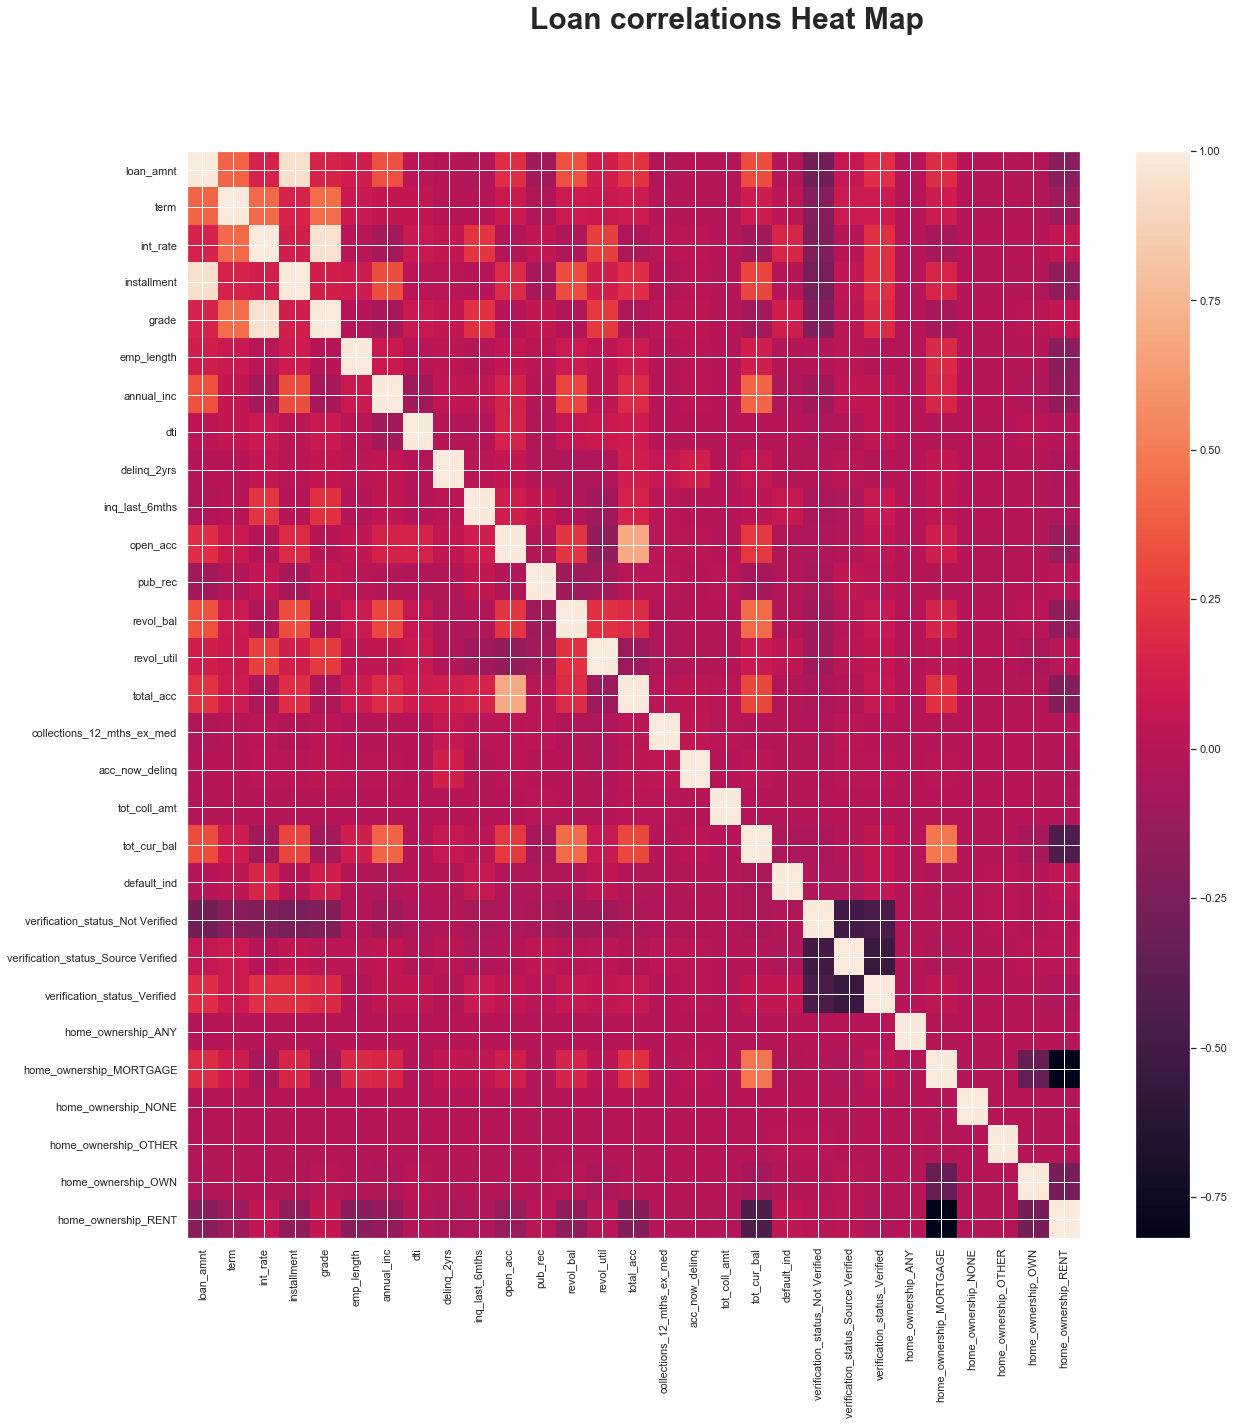

In [113]:
# Heatmap on the correlations between features in the loan data
credit_correlations = credit_data.corr()
plt.figure(figsize=(20, 20,))
plt.imshow(credit_correlations, cmap=None, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(credit_correlations)), credit_correlations.columns, rotation='vertical')
plt.yticks(range(len(credit_correlations)), credit_correlations.columns);
plt.suptitle('Loan correlations Heat Map', fontsize=30, fontweight='bold')
plt.show()

Data preparation is finished and we can now start to apply machine learning algorithms in order to predict the credit risk.

It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.
As the dataset contains to many rows, first we need to get a subset of the original dataset in order to be possiblle to apply the supervised learning algorithms to test our model.

## Step 5: Classification
[[ go back to the top ]](#Table-of-contents)

To advance to the data analysis we need to gather the test and the train samples. To do so we will import the function train_test_split from sklearn and use it on thecredit_data data.

In [114]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

credit_data_subset = credit_data.sample(frac=0.10)
X = credit_data_subset[credit_data_subset.columns.drop(['default_ind', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'])] 
y = credit_data_subset['default_ind']

# get a test dataset with 10% of the credit_data_subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_test.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,tot_cur_bal,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
242263,6000,36.0,16.49,212.40,4,0.0,25540.0,29.23,0,2,...,26842.0,0,0,1,0,0,0,0,0,1
104003,15000,60.0,13.68,346.55,3,0.0,37000.0,15.89,0,1,...,124751.0,0,0,1,0,1,0,0,0,0
244499,16000,36.0,7.49,497.63,1,10.0,85000.0,20.32,0,0,...,54820.0,1,0,0,0,1,0,0,0,0
669548,15000,60.0,13.33,343.84,3,1.0,43000.0,17.64,0,0,...,39428.0,0,1,0,0,1,0,0,0,0
75598,9600,36.0,6.03,292.19,1,10.0,28000.0,6.64,0,0,...,37661.0,1,0,0,0,0,0,0,1,0
813178,8050,36.0,17.86,290.47,4,0.0,27000.0,19.24,0,1,...,9829.0,0,0,1,0,0,0,0,0,1
337768,11000,36.0,10.99,360.08,2,3.0,28000.0,24.26,0,1,...,23102.0,0,1,0,0,0,0,0,0,1
243258,22425,60.0,22.99,632.05,6,10.0,95000.0,17.36,4,2,...,182226.0,0,1,0,0,1,0,0,0,0
76237,6000,36.0,15.61,209.79,3,9.0,23000.0,21.14,0,2,...,11056.0,0,0,1,0,0,0,0,0,1
759512,12000,36.0,7.89,375.43,1,5.0,85000.0,19.71,0,0,...,67340.0,1,0,0,0,1,0,0,0,0


This way, the test sample will have results with a size corresponding to 10% of the total data.

In [115]:
X_train.info()
print()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77032 entries, 250180 to 251605
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            77032 non-null  int64  
 1   term                                 77032 non-null  float64
 2   int_rate                             77032 non-null  float64
 3   installment                          77032 non-null  float64
 4   grade                                77032 non-null  int64  
 5   emp_length                           77032 non-null  float64
 6   annual_inc                           77032 non-null  float64
 7   dti                                  77032 non-null  float64
 8   delinq_2yrs                          77032 non-null  int64  
 9   inq_last_6mths                       77032 non-null  int64  
 10  open_acc                             77032 non-null  int64  
 11  pub_rec               

### 5.1: Decision Trees
[[ go back to the top ]](#Table-of-contents)

In [116]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, y_test)

0.8898364485981308

We have achieved an accuracy of aproximately 89%. But let's see how this accuracy varies depending on how our training and testing set was sampled.

''

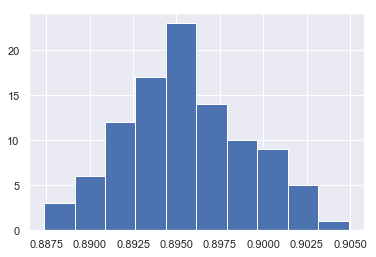

In [117]:
model_accuracies = []

for repetition in range(100):
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(X, y, test_size=0.1)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

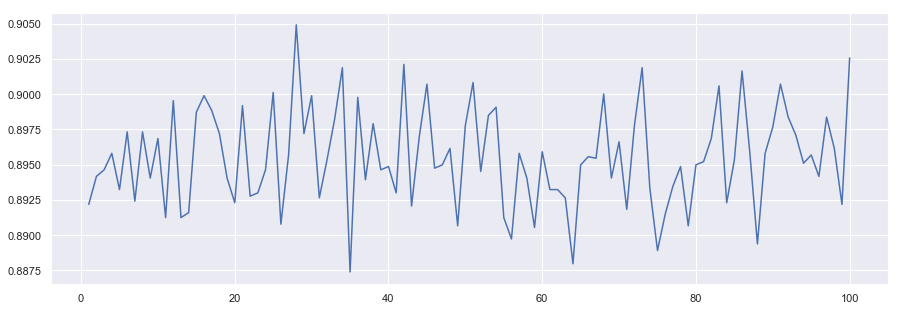

In [118]:
x = np.arange(1,101,1)
plt.figure(figsize=(15, 5))
plt.plot(x,model_accuracies)

In [119]:
print("Min: ", min(model_accuracies))
print("Max: ", max(model_accuracies))

Min:  0.8873831775700934
Max:  0.9049065420560748


Analysing this results, we conclude that the accuracy of the model doesn't vary much, around 3%. This is called **overfitting**, and happens because the model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.

#### 5.1.1: Cross Validation
[[ go back to the top ]](#Table-of-contents)

In order to escape from *overfitting* problem, we can try to perform **k-fold cross-validation** on our model to estimate the skill of our machine learning model on unseen data. 

This procedure randomly splits the original dataset into *k* groups of approximately equal size, and then takes one of the subsets as training set and the other *k-1* subsets are used to fit the model. This process is then repeated *k* times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here.

''

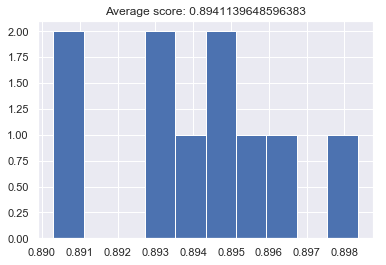

In [120]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [121]:
print("Min: ", min(cv_scores))
print("Max: ", max(cv_scores))

Min:  0.890303738317757
Max:  0.8983526112863652


Now we have a more consistent rating of our classifier's general classification accuracy.

#### 5.1.2: Parameter Tuning
[[ go back to the top ]](#Table-of-contents)

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier.

The most common method for model parameter tuning is **Grid Search**. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. Let's start by tuning only two parameters and analyse the results.

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': range(1,10),
                  'max_features': range(1, 10)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

KeyboardInterrupt: 

Now let's visualize the grid search to see how the parameters interact.

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (9, 9)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(9) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(9) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Now we have a better sense of the parameter space.

To allow the decision tree to make more than a one-off decision, the Decision Tree needs to have at least a `max_depth` of 2.

`max_features` parameter doesn't seem to make a huge difference in the results, as they are very similar independently of the number of *max_features*.

Now, let's apply grid search tunning more parameters in order to find the best options.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(1, 10),
                  'max_features': range(1,10)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Let's get the best classifier:

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

Here we have the best classifier, that allows our model to achieve a score of aproximately 95%. As the other Decision Tree models that we have calculated have an accuracy around 90%, it's a huge improve.

We can also visualize the Decision Tree:

In [ ]:
import sklearn.tree as tree

tree.plot_tree(decision_tree_classifier)
plt.figure(figsize=(15, 150))
plt.show()

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

### 5.2: K-Nearest Neighbor
[[ go back to the top ]](#Table-of-contents)

The K-Nearest Neighbors algorithm (k-NN) is a non-parametric classification method. The input consists of the k closest training examples in data set. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Let's start to apply this algorithmn to our model with k=5 and see the results.

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Calculating the accuracy score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
yk_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, yk_pred))

For k=5, we have an accuracy of 93.97%, which is a good result. But let's see how the accuracy varies when k goes from 1 to 20.

In [ ]:
# Testing accuracy for k ranging from 1 to 20
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Create a DataFrame of K and scores
column_dict = {'K':k_range, 'accuracy score':scores}
df = pd.DataFrame(column_dict).set_index('K')
df

In [ ]:
# Plot the relationship between K and Accuracy score.
df.plot(y='accuracy score');
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy Score');

From this graphic, we can conclude that for the first 10 values the accuracy is a little bit variable, but then, from k= 10 to 20, the accuracy is more consistent.

In [ ]:
# Find the maximum accuracy score and the associated K value.
df.sort_values('accuracy score')

When using KNN on this data set with the selected features, we achieve the best accuracy when k=8, when the accuracy is 94.26%.

### Neuronal Networks ANN

In [181]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [182]:
credit_data_subset = credit_data.sample(frac=0.1)
X = credit_data_subset[credit_data_subset.columns.drop(['grade', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'])] 
y = credit_data_subset['default_ind']

In [183]:
# get a test dataset with 10% of the credit_data_subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [184]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [185]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

In [187]:
# Train the classifier on the training set
ANNClassifier.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=1)

[[16218     0]
 [    1   900]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16218
           1       1.00      1.00      1.00       901

    accuracy                           1.00     17119
   macro avg       1.00      1.00      1.00     17119
weighted avg       1.00      1.00      1.00     17119



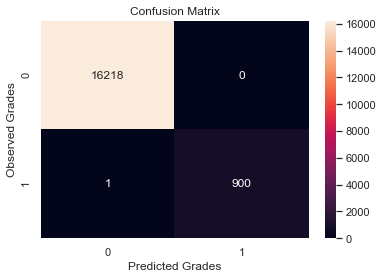

In [188]:
predictions = ANNClassifier.predict(X_test)

confusion_matrix_ann = confusion_matrix(y_test,predictions)
print(confusion_matrix_ann)

print(classification_report(y_test,predictions))

sn.set(font_scale=1.0)

ax = plt.subplot()

sn.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

In [135]:
parameter_grid = {'activation': ['tanh','identity','logistic','relu'],
                  'solver': ['adam','lbfgs','sgd'],
                  'hidden_layer_sizes': [3,5,8,13,21,34],
                  'verbose': [True]}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(ANNClassifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)

Iteration 1, loss = 1.96501358
Iteration 2, loss = 1.77978874
Iteration 3, loss = 1.60959287
Iteration 4, loss = 1.45961152
Iteration 5, loss = 1.33062829
Iteration 6, loss = 1.22370404
Iteration 7, loss = 1.13708002
Iteration 8, loss = 1.06561982
Iteration 9, loss = 1.00442263
Iteration 10, loss = 0.95273521
Iteration 11, loss = 0.90929407
Iteration 12, loss = 0.87149916
Iteration 13, loss = 0.83835609
Iteration 14, loss = 0.80860720
Iteration 15, loss = 0.78214093
Iteration 16, loss = 0.75802249
Iteration 17, loss = 0.73627140
Iteration 18, loss = 0.71663540
Iteration 19, loss = 0.69867800
Iteration 20, loss = 0.68278674
Iteration 21, loss = 0.66797241
Iteration 22, loss = 0.65485142
Iteration 23, loss = 0.64312252
Iteration 24, loss = 0.63225976
Iteration 25, loss = 0.62210465
Iteration 26, loss = 0.61354512
Iteration 27, loss = 0.60536455
Iteration 28, loss = 0.59807495
Iteration 29, loss = 0.59177620
Iteration 30, loss = 0.58549047
Iteration 31, loss = 0.58020074
Iteration 32, los

Iteration 257, loss = 0.42979431
Iteration 258, loss = 0.42974121
Iteration 259, loss = 0.42965349
Iteration 260, loss = 0.42946302
Iteration 261, loss = 0.42950811
Iteration 262, loss = 0.42926681
Iteration 263, loss = 0.42921178
Iteration 264, loss = 0.42885570
Iteration 265, loss = 0.42871226
Iteration 266, loss = 0.42921496
Iteration 267, loss = 0.42880240
Iteration 268, loss = 0.42858387
Iteration 269, loss = 0.42840260
Iteration 270, loss = 0.42814478
Iteration 271, loss = 0.42835218
Iteration 272, loss = 0.42836002
Iteration 273, loss = 0.42814077
Iteration 274, loss = 0.42794222
Iteration 275, loss = 0.42807856
Iteration 276, loss = 0.42796838
Iteration 277, loss = 0.42775948
Iteration 278, loss = 0.42751025
Iteration 279, loss = 0.42764945
Iteration 280, loss = 0.42765701
Iteration 281, loss = 0.42752479
Iteration 282, loss = 0.42731434
Iteration 283, loss = 0.42694637
Iteration 284, loss = 0.42731503
Iteration 285, loss = 0.42687557
Iteration 286, loss = 0.42678657
Iteration 

Iteration 34, loss = 0.56594154
Iteration 35, loss = 0.56197329
Iteration 36, loss = 0.55832110
Iteration 37, loss = 0.55461508
Iteration 38, loss = 0.55132555
Iteration 39, loss = 0.54816888
Iteration 40, loss = 0.54519116
Iteration 41, loss = 0.54253999
Iteration 42, loss = 0.53980308
Iteration 43, loss = 0.53728273
Iteration 44, loss = 0.53489986
Iteration 45, loss = 0.53258562
Iteration 46, loss = 0.53089101
Iteration 47, loss = 0.52880736
Iteration 48, loss = 0.52658500
Iteration 49, loss = 0.52474019
Iteration 50, loss = 0.52287853
Iteration 51, loss = 0.52143688
Iteration 52, loss = 0.51972687
Iteration 53, loss = 0.51803660
Iteration 54, loss = 0.51637279
Iteration 55, loss = 0.51507144
Iteration 56, loss = 0.51361763
Iteration 57, loss = 0.51234664
Iteration 58, loss = 0.51096163
Iteration 59, loss = 0.50960157
Iteration 60, loss = 0.50839320
Iteration 61, loss = 0.50719665
Iteration 62, loss = 0.50614684
Iteration 63, loss = 0.50472324
Iteration 64, loss = 0.50390146
Iteratio

Iteration 288, loss = 0.42623383
Iteration 289, loss = 0.42608943
Iteration 290, loss = 0.42621063
Iteration 291, loss = 0.42586359
Iteration 292, loss = 0.42590888
Iteration 293, loss = 0.42561735
Iteration 294, loss = 0.42541731
Iteration 295, loss = 0.42554061
Iteration 296, loss = 0.42545863
Iteration 297, loss = 0.42607823
Iteration 298, loss = 0.42538131
Iteration 299, loss = 0.42517991
Iteration 300, loss = 0.42512192
Iteration 301, loss = 0.42509756
Iteration 302, loss = 0.42525460
Iteration 303, loss = 0.42502754
Iteration 304, loss = 0.42506329
Iteration 305, loss = 0.42449605
Iteration 306, loss = 0.42453555
Iteration 307, loss = 0.42455020
Iteration 308, loss = 0.42432238
Iteration 309, loss = 0.42458346
Iteration 310, loss = 0.42410325
Iteration 311, loss = 0.42378359
Iteration 312, loss = 0.42443541
Iteration 313, loss = 0.42397879
Iteration 314, loss = 0.42395609
Iteration 315, loss = 0.42430622
Iteration 316, loss = 0.42384415
Iteration 317, loss = 0.42369942
Iteration 

Iteration 72, loss = 0.49506133
Iteration 73, loss = 0.49423604
Iteration 74, loss = 0.49337269
Iteration 75, loss = 0.49252532
Iteration 76, loss = 0.49159690
Iteration 77, loss = 0.49087241
Iteration 78, loss = 0.48987891
Iteration 79, loss = 0.48915202
Iteration 80, loss = 0.48844848
Iteration 81, loss = 0.48760219
Iteration 82, loss = 0.48681489
Iteration 83, loss = 0.48608412
Iteration 84, loss = 0.48541175
Iteration 85, loss = 0.48473585
Iteration 86, loss = 0.48402011
Iteration 87, loss = 0.48338262
Iteration 88, loss = 0.48262142
Iteration 89, loss = 0.48192215
Iteration 90, loss = 0.48119359
Iteration 91, loss = 0.48064437
Iteration 92, loss = 0.48007855
Iteration 93, loss = 0.47952190
Iteration 94, loss = 0.47855682
Iteration 95, loss = 0.47817533
Iteration 96, loss = 0.47744961
Iteration 97, loss = 0.47690009
Iteration 98, loss = 0.47642701
Iteration 99, loss = 0.47551810
Iteration 100, loss = 0.47496435
Iteration 101, loss = 0.47462250
Iteration 102, loss = 0.47402754
Itera

Iteration 321, loss = 0.42355702
Iteration 322, loss = 0.42373860
Iteration 323, loss = 0.42350447
Iteration 324, loss = 0.42340593
Iteration 325, loss = 0.42320986
Iteration 326, loss = 0.42340245
Iteration 327, loss = 0.42302683
Iteration 328, loss = 0.42319153
Iteration 329, loss = 0.42301341
Iteration 330, loss = 0.42289191
Iteration 331, loss = 0.42286910
Iteration 332, loss = 0.42285354
Iteration 333, loss = 0.42281849
Iteration 334, loss = 0.42259041
Iteration 335, loss = 0.42276868
Iteration 336, loss = 0.42261880
Iteration 337, loss = 0.42260333
Iteration 338, loss = 0.42245350
Iteration 339, loss = 0.42240120
Iteration 340, loss = 0.42225159
Iteration 341, loss = 0.42219362
Iteration 342, loss = 0.42238144
Iteration 343, loss = 0.42220424
Iteration 344, loss = 0.42216563
Iteration 345, loss = 0.42190537
Iteration 346, loss = 0.42195058
Iteration 347, loss = 0.42205697
Iteration 348, loss = 0.42197628
Iteration 349, loss = 0.42200730
Iteration 350, loss = 0.42189320
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.96739071
Iteration 2, loss = 1.78132103
Iteration 3, loss = 1.60968976
Iteration 4, loss = 1.45890514
Iteration 5, loss = 1.33013014
Iteration 6, loss = 1.22336376
Iteration 7, loss = 1.13718794
Iteration 8, loss = 1.06679167
Iteration 9, loss = 1.00763870
Iteration 10, loss = 0.95606548
Iteration 11, loss = 0.91167978
Iteration 12, loss = 0.87404012
Iteration 13, loss = 0.84074028
Iteration 14, loss = 0.81112552
Iteration 15, loss = 0.78462990
Iteration 16, loss = 0.76036548
Iteration 17, loss = 0.73860287
Iteration 18, loss = 0.71857572
Iteration 19, loss = 0.70055204
Iteration 20, loss = 0.68429948
Iteration 21, loss = 0.66928247
Iteration 22, loss = 0.65586935
Iteration 23, loss = 0.64375352
Iteration 24, loss = 0.63313730
Iteration 25, loss = 0.62266679
Iteration 26, loss = 0.61366829
Iteration 27, loss = 0.60538703
Iteration 28, loss = 0.59797960
Iteration 29, loss = 0.59140068
Iteration 30, loss = 0.58500087
Iteration 31, loss = 0.57940464
Iteration 32, los

Iteration 255, loss = 0.42936481
Iteration 256, loss = 0.42942089
Iteration 257, loss = 0.42901941
Iteration 258, loss = 0.42917696
Iteration 259, loss = 0.42900098
Iteration 260, loss = 0.42881423
Iteration 261, loss = 0.42871004
Iteration 262, loss = 0.42866705
Iteration 263, loss = 0.42851339
Iteration 264, loss = 0.42836599
Iteration 265, loss = 0.42812874
Iteration 266, loss = 0.42817667
Iteration 267, loss = 0.42795037
Iteration 268, loss = 0.42803992
Iteration 269, loss = 0.42797573
Iteration 270, loss = 0.42766074
Iteration 271, loss = 0.42771370
Iteration 272, loss = 0.42770392
Iteration 273, loss = 0.42748909
Iteration 274, loss = 0.42753955
Iteration 275, loss = 0.42711466
Iteration 276, loss = 0.42717681
Iteration 277, loss = 0.42711951
Iteration 278, loss = 0.42701174
Iteration 279, loss = 0.42709908
Iteration 280, loss = 0.42686268
Iteration 281, loss = 0.42671310
Iteration 282, loss = 0.42651422
Iteration 283, loss = 0.42653440
Iteration 284, loss = 0.42667202
Iteration 

Iteration 60, loss = 0.50625654
Iteration 61, loss = 0.50499495
Iteration 62, loss = 0.50394320
Iteration 63, loss = 0.50297342
Iteration 64, loss = 0.50172400
Iteration 65, loss = 0.50045006
Iteration 66, loss = 0.49944314
Iteration 67, loss = 0.49860379
Iteration 68, loss = 0.49745978
Iteration 69, loss = 0.49640644
Iteration 70, loss = 0.49550582
Iteration 71, loss = 0.49488360
Iteration 72, loss = 0.49372174
Iteration 73, loss = 0.49294450
Iteration 74, loss = 0.49209953
Iteration 75, loss = 0.49112829
Iteration 76, loss = 0.49064298
Iteration 77, loss = 0.48944375
Iteration 78, loss = 0.48867461
Iteration 79, loss = 0.48790615
Iteration 80, loss = 0.48723862
Iteration 81, loss = 0.48628240
Iteration 82, loss = 0.48534316
Iteration 83, loss = 0.48469727
Iteration 84, loss = 0.48413583
Iteration 85, loss = 0.48341673
Iteration 86, loss = 0.48272731
Iteration 87, loss = 0.48183553
Iteration 88, loss = 0.48145369
Iteration 89, loss = 0.48072858
Iteration 90, loss = 0.47993112
Iteratio

Iteration 310, loss = 0.42165193
Iteration 311, loss = 0.42176091
Iteration 312, loss = 0.42183273
Iteration 313, loss = 0.42149511
Iteration 314, loss = 0.42166669
Iteration 315, loss = 0.42149973
Iteration 316, loss = 0.42127805
Iteration 317, loss = 0.42129739
Iteration 318, loss = 0.42114949
Iteration 319, loss = 0.42149117
Iteration 320, loss = 0.42095263
Iteration 321, loss = 0.42093130
Iteration 322, loss = 0.42131334
Iteration 323, loss = 0.42082605
Iteration 324, loss = 0.42088684
Iteration 325, loss = 0.42105416
Iteration 326, loss = 0.42084924
Iteration 327, loss = 0.42106106
Iteration 328, loss = 0.42062146
Iteration 329, loss = 0.42073864
Iteration 330, loss = 0.42050573
Iteration 331, loss = 0.42047786
Iteration 332, loss = 0.42060974
Iteration 333, loss = 0.42038171
Iteration 334, loss = 0.42047328
Iteration 335, loss = 0.42029648
Iteration 336, loss = 0.41994207
Iteration 337, loss = 0.41989637
Iteration 338, loss = 0.42009252
Iteration 339, loss = 0.42004043
Iteration 

Iteration 105, loss = 0.47073574
Iteration 106, loss = 0.47027479
Iteration 107, loss = 0.46959887
Iteration 108, loss = 0.46920153
Iteration 109, loss = 0.46864715
Iteration 110, loss = 0.46814794
Iteration 111, loss = 0.46752098
Iteration 112, loss = 0.46705595
Iteration 113, loss = 0.46657692
Iteration 114, loss = 0.46618896
Iteration 115, loss = 0.46545254
Iteration 116, loss = 0.46493409
Iteration 117, loss = 0.46439874
Iteration 118, loss = 0.46385076
Iteration 119, loss = 0.46355998
Iteration 120, loss = 0.46323811
Iteration 121, loss = 0.46241259
Iteration 122, loss = 0.46210111
Iteration 123, loss = 0.46152836
Iteration 124, loss = 0.46133624
Iteration 125, loss = 0.46066905
Iteration 126, loss = 0.46028891
Iteration 127, loss = 0.45985800
Iteration 128, loss = 0.45926006
Iteration 129, loss = 0.45899000
Iteration 130, loss = 0.45861900
Iteration 131, loss = 0.45807137
Iteration 132, loss = 0.45759481
Iteration 133, loss = 0.45724116
Iteration 134, loss = 0.45673597
Iteration 

Iteration 355, loss = 0.42064207
Iteration 356, loss = 0.42041749
Iteration 357, loss = 0.42057419
Iteration 358, loss = 0.42027866
Iteration 359, loss = 0.42052503
Iteration 360, loss = 0.42069507
Iteration 361, loss = 0.42050622
Iteration 362, loss = 0.42039701
Iteration 363, loss = 0.42043768
Iteration 364, loss = 0.42004724
Iteration 365, loss = 0.42023235
Iteration 366, loss = 0.42036793
Iteration 367, loss = 0.42005098
Iteration 368, loss = 0.42029768
Iteration 369, loss = 0.41990751
Iteration 370, loss = 0.41997198
Iteration 371, loss = 0.41996213
Iteration 372, loss = 0.41992623
Iteration 373, loss = 0.41972963
Iteration 374, loss = 0.41962527
Iteration 375, loss = 0.42028027
Iteration 376, loss = 0.41960427
Iteration 377, loss = 0.41954392
Iteration 378, loss = 0.41977952
Iteration 379, loss = 0.41966506
Iteration 380, loss = 0.41921373
Iteration 381, loss = 0.41951787
Iteration 382, loss = 0.41931760
Iteration 383, loss = 0.41946544
Iteration 384, loss = 0.41909635
Iteration 

Iteration 206, loss = 0.43463883
Iteration 207, loss = 0.43428558
Iteration 208, loss = 0.43412000
Iteration 209, loss = 0.43402891
Iteration 210, loss = 0.43369245
Iteration 211, loss = 0.43368508
Iteration 212, loss = 0.43349638
Iteration 213, loss = 0.43324634
Iteration 214, loss = 0.43292320
Iteration 215, loss = 0.43284262
Iteration 216, loss = 0.43292185
Iteration 217, loss = 0.43280140
Iteration 218, loss = 0.43254147
Iteration 219, loss = 0.43209897
Iteration 220, loss = 0.43188228
Iteration 221, loss = 0.43205341
Iteration 222, loss = 0.43188961
Iteration 223, loss = 0.43167655
Iteration 224, loss = 0.43125277
Iteration 225, loss = 0.43126468
Iteration 226, loss = 0.43088137
Iteration 227, loss = 0.43120232
Iteration 228, loss = 0.43072970
Iteration 229, loss = 0.43075622
Iteration 230, loss = 0.43041066
Iteration 231, loss = 0.43029648
Iteration 232, loss = 0.43029683
Iteration 233, loss = 0.42984141
Iteration 234, loss = 0.42991119
Iteration 235, loss = 0.42987475
Iteration 

Iteration 8, loss = 1.06302765
Iteration 9, loss = 1.00249103
Iteration 10, loss = 0.95155118
Iteration 11, loss = 0.90816869
Iteration 12, loss = 0.87029278
Iteration 13, loss = 0.83705567
Iteration 14, loss = 0.80744215
Iteration 15, loss = 0.78081947
Iteration 16, loss = 0.75691998
Iteration 17, loss = 0.73510476
Iteration 18, loss = 0.71527041
Iteration 19, loss = 0.69762379
Iteration 20, loss = 0.68158025
Iteration 21, loss = 0.66704573
Iteration 22, loss = 0.65381863
Iteration 23, loss = 0.64183266
Iteration 24, loss = 0.63112384
Iteration 25, loss = 0.62114395
Iteration 26, loss = 0.61237618
Iteration 27, loss = 0.60436246
Iteration 28, loss = 0.59713067
Iteration 29, loss = 0.59060130
Iteration 30, loss = 0.58449550
Iteration 31, loss = 0.57909883
Iteration 32, loss = 0.57381721
Iteration 33, loss = 0.56918578
Iteration 34, loss = 0.56468443
Iteration 35, loss = 0.56086726
Iteration 36, loss = 0.55692601
Iteration 37, loss = 0.55353692
Iteration 38, loss = 0.55012914
Iteration 

Iteration 265, loss = 0.42826749
Iteration 266, loss = 0.42828996
Iteration 267, loss = 0.42804557
Iteration 268, loss = 0.42805175
Iteration 269, loss = 0.42788260
Iteration 270, loss = 0.42805069
Iteration 271, loss = 0.42796908
Iteration 272, loss = 0.42774622
Iteration 273, loss = 0.42784055
Iteration 274, loss = 0.42772679
Iteration 275, loss = 0.42744694
Iteration 276, loss = 0.42741367
Iteration 277, loss = 0.42719649
Iteration 278, loss = 0.42719334
Iteration 279, loss = 0.42713618
Iteration 280, loss = 0.42705978
Iteration 281, loss = 0.42674135
Iteration 282, loss = 0.42677312
Iteration 283, loss = 0.42662909
Iteration 284, loss = 0.42643661
Iteration 285, loss = 0.42670562
Iteration 286, loss = 0.42634814
Iteration 287, loss = 0.42644408
Iteration 288, loss = 0.42610583
Iteration 289, loss = 0.42603696
Iteration 290, loss = 0.42606150
Iteration 291, loss = 0.42614858
Iteration 292, loss = 0.42621033
Iteration 293, loss = 0.42605698
Iteration 294, loss = 0.42580899
Iteration 

Iteration 153, loss = 0.45373682
Iteration 154, loss = 0.45360790
Iteration 155, loss = 0.45312133
Iteration 156, loss = 0.45258342
Iteration 157, loss = 0.45244742
Iteration 158, loss = 0.45187200
Iteration 159, loss = 0.45167896
Iteration 160, loss = 0.45151083
Iteration 161, loss = 0.45098333
Iteration 162, loss = 0.45063189
Iteration 163, loss = 0.45034004
Iteration 164, loss = 0.45027767
Iteration 165, loss = 0.44954904
Iteration 166, loss = 0.44926440
Iteration 167, loss = 0.44913409
Iteration 168, loss = 0.44869864
Iteration 169, loss = 0.44858880
Iteration 170, loss = 0.44806657
Iteration 171, loss = 0.44819389
Iteration 172, loss = 0.44758063
Iteration 173, loss = 0.44729905
Iteration 174, loss = 0.44704010
Iteration 175, loss = 0.44681529
Iteration 176, loss = 0.44636864
Iteration 177, loss = 0.44634981
Iteration 178, loss = 0.44605750
Iteration 179, loss = 0.44579117
Iteration 180, loss = 0.44548248
Iteration 181, loss = 0.44533664
Iteration 182, loss = 0.44493841
Iteration 

Iteration 402, loss = 0.42169883
Iteration 403, loss = 0.42152234
Iteration 404, loss = 0.42191587
Iteration 405, loss = 0.42167205
Iteration 406, loss = 0.42156635
Iteration 407, loss = 0.42136995
Iteration 408, loss = 0.42154232
Iteration 409, loss = 0.42140303
Iteration 410, loss = 0.42157283
Iteration 411, loss = 0.42132640
Iteration 412, loss = 0.42114980
Iteration 413, loss = 0.42140204
Iteration 414, loss = 0.42097968
Iteration 415, loss = 0.42100170
Iteration 416, loss = 0.42108183
Iteration 417, loss = 0.42123480
Iteration 418, loss = 0.42110358
Iteration 419, loss = 0.42107757
Iteration 420, loss = 0.42070632
Iteration 421, loss = 0.42106621
Iteration 422, loss = 0.42077783
Iteration 423, loss = 0.42086969
Iteration 424, loss = 0.42101794
Iteration 425, loss = 0.42091847
Iteration 426, loss = 0.42067968
Iteration 427, loss = 0.42067715
Iteration 428, loss = 0.42053244
Iteration 429, loss = 0.42058638
Iteration 430, loss = 0.42039518
Iteration 431, loss = 0.42048171
Iteration 

Iteration 166, loss = 0.44583945
Iteration 167, loss = 0.44570817
Iteration 168, loss = 0.44521080
Iteration 169, loss = 0.44483677
Iteration 170, loss = 0.44458134
Iteration 171, loss = 0.44439883
Iteration 172, loss = 0.44415813
Iteration 173, loss = 0.44361422
Iteration 174, loss = 0.44340228
Iteration 175, loss = 0.44316283
Iteration 176, loss = 0.44282563
Iteration 177, loss = 0.44264534
Iteration 178, loss = 0.44224447
Iteration 179, loss = 0.44195955
Iteration 180, loss = 0.44201275
Iteration 181, loss = 0.44148243
Iteration 182, loss = 0.44136888
Iteration 183, loss = 0.44120562
Iteration 184, loss = 0.44080838
Iteration 185, loss = 0.44057833
Iteration 186, loss = 0.44036197
Iteration 187, loss = 0.44016699
Iteration 188, loss = 0.44000674
Iteration 189, loss = 0.43966023
Iteration 190, loss = 0.43948158
Iteration 191, loss = 0.43936722
Iteration 192, loss = 0.43890311
Iteration 193, loss = 0.43891162
Iteration 194, loss = 0.43849807
Iteration 195, loss = 0.43836368
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

Iteration 1, loss = 1.99918409
Iteration 2, loss = 1.86348633
Iteration 3, loss = 1.74930567
Iteration 4, loss = 1.65187364
Iteration 5, loss = 1.56781497
Iteration 6, loss = 1.49476970
Iteration 7, loss = 1.43026988
Iteration 8, loss = 1.37265822
Iteration 9, loss = 1.32074238
Iteration 10, loss = 1.27363808
Iteration 11, loss = 1.23071398
Iteration 12, loss = 1.19158556
Iteration 13, loss = 1.15584335
Iteration 14, loss = 1.12333350
Iteration 15, loss = 1.09359509
Iteration 16, loss = 1.06635536
Iteration 17, loss = 1.04138603
Iteration 18, loss = 1.01845877
Iteration 19, loss = 0.99744187
Iteration 20, loss = 0.97818473
Iteration 21, loss = 0.96043909
Iteration 22, loss = 0.94413075
Iteration 23, loss = 0.92913494
Iteration 24, loss = 0.91526678
Iteration 25, loss = 0.90237891
Iteration 26, loss = 0.89043669
Iteration 27, loss = 0.87924125
Iteration 28, loss = 0.86878201
Iteration 29, loss = 0.85895573
Iteration 30, loss = 0.84975945
Iteration 31, loss = 0.84118600
Iteration 32, los

Iteration 253, loss = 0.51923383
Iteration 254, loss = 0.51893351
Iteration 255, loss = 0.51861123
Iteration 256, loss = 0.51837157
Iteration 257, loss = 0.51802417
Iteration 258, loss = 0.51775081
Iteration 259, loss = 0.51749862
Iteration 260, loss = 0.51718968
Iteration 261, loss = 0.51690664
Iteration 262, loss = 0.51662935
Iteration 263, loss = 0.51637042
Iteration 264, loss = 0.51609016
Iteration 265, loss = 0.51585567
Iteration 266, loss = 0.51565482
Iteration 267, loss = 0.51535967
Iteration 268, loss = 0.51507917
Iteration 269, loss = 0.51478685
Iteration 270, loss = 0.51452485
Iteration 271, loss = 0.51430922
Iteration 272, loss = 0.51407163
Iteration 273, loss = 0.51377051
Iteration 274, loss = 0.51351654
Iteration 275, loss = 0.51335376
Iteration 276, loss = 0.51312883
Iteration 277, loss = 0.51282416
Iteration 278, loss = 0.51263626
Iteration 279, loss = 0.51239139
Iteration 280, loss = 0.51216344
Iteration 281, loss = 0.51194899
Iteration 282, loss = 0.51168710
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.99974748
Iteration 2, loss = 1.86438397
Iteration 3, loss = 1.74991645
Iteration 4, loss = 1.65225397
Iteration 5, loss = 1.56797060
Iteration 6, loss = 1.49456146
Iteration 7, loss = 1.42983309
Iteration 8, loss = 1.37205038
Iteration 9, loss = 1.32003744
Iteration 10, loss = 1.27280311
Iteration 11, loss = 1.22980464
Iteration 12, loss = 1.19057767
Iteration 13, loss = 1.15480990
Iteration 14, loss = 1.12234253
Iteration 15, loss = 1.09266329
Iteration 16, loss = 1.06548360
Iteration 17, loss = 1.04062043
Iteration 18, loss = 1.01782716
Iteration 19, loss = 0.99688738
Iteration 20, loss = 0.97765886
Iteration 21, loss = 0.95999686
Iteration 22, loss = 0.94372694
Iteration 23, loss = 0.92872627
Iteration 24, loss = 0.91484767
Iteration 25, loss = 0.90199677
Iteration 26, loss = 0.89005014
Iteration 27, loss = 0.87888250
Iteration 28, loss = 0.86845749
Iteration 29, loss = 0.85867488
Iteration 30, loss = 0.84952075
Iteration 31, loss = 0.84095738
Iteration 32, los

Iteration 254, loss = 0.51838863
Iteration 255, loss = 0.51807745
Iteration 256, loss = 0.51779205
Iteration 257, loss = 0.51756817
Iteration 258, loss = 0.51721701
Iteration 259, loss = 0.51694155
Iteration 260, loss = 0.51668391
Iteration 261, loss = 0.51640805
Iteration 262, loss = 0.51613520
Iteration 263, loss = 0.51583881
Iteration 264, loss = 0.51562726
Iteration 265, loss = 0.51528458
Iteration 266, loss = 0.51502547
Iteration 267, loss = 0.51485918
Iteration 268, loss = 0.51455487
Iteration 269, loss = 0.51426597
Iteration 270, loss = 0.51404929
Iteration 271, loss = 0.51381781
Iteration 272, loss = 0.51354613
Iteration 273, loss = 0.51330298
Iteration 274, loss = 0.51301079
Iteration 275, loss = 0.51281541
Iteration 276, loss = 0.51251574
Iteration 277, loss = 0.51224304
Iteration 278, loss = 0.51204122
Iteration 279, loss = 0.51180223
Iteration 280, loss = 0.51156410
Iteration 281, loss = 0.51139367
Iteration 282, loss = 0.51113216
Iteration 283, loss = 0.51092164
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 3, loss = 1.74858103
Iteration 4, loss = 1.65087397
Iteration 5, loss = 1.56672611
Iteration 6, loss = 1.49341248
Iteration 7, loss = 1.42874091
Iteration 8, loss = 1.37107213
Iteration 9, loss = 1.31908480
Iteration 10, loss = 1.27200011
Iteration 11, loss = 1.22919346
Iteration 12, loss = 1.19018873
Iteration 13, loss = 1.15454322
Iteration 14, loss = 1.12209038
Iteration 15, loss = 1.09246817
Iteration 16, loss = 1.06536729
Iteration 17, loss = 1.04051749
Iteration 18, loss = 1.01772565
Iteration 19, loss = 0.99683653
Iteration 20, loss = 0.97762117
Iteration 21, loss = 0.95996519
Iteration 22, loss = 0.94371284
Iteration 23, loss = 0.92872559
Iteration 24, loss = 0.91483871
Iteration 25, loss = 0.90195860
Iteration 26, loss = 0.88997043
Iteration 27, loss = 0.87879100
Iteration 28, loss = 0.86836674
Iteration 29, loss = 0.85861571
Iteration 30, loss = 0.84951058
Iteration 31, loss = 0.84098653
Iteration 32, loss = 0.83305797
Iteration 33, loss = 0.82554921
Iteration 34, 

Iteration 256, loss = 0.51616542
Iteration 257, loss = 0.51591967
Iteration 258, loss = 0.51560480
Iteration 259, loss = 0.51536391
Iteration 260, loss = 0.51508828
Iteration 261, loss = 0.51488011
Iteration 262, loss = 0.51452283
Iteration 263, loss = 0.51432795
Iteration 264, loss = 0.51406285
Iteration 265, loss = 0.51381707
Iteration 266, loss = 0.51363219
Iteration 267, loss = 0.51325130
Iteration 268, loss = 0.51307348
Iteration 269, loss = 0.51281317
Iteration 270, loss = 0.51253901
Iteration 271, loss = 0.51235427
Iteration 272, loss = 0.51203298
Iteration 273, loss = 0.51185183
Iteration 274, loss = 0.51155496
Iteration 275, loss = 0.51134339
Iteration 276, loss = 0.51108930
Iteration 277, loss = 0.51086112
Iteration 278, loss = 0.51062539
Iteration 279, loss = 0.51041908
Iteration 280, loss = 0.51019806
Iteration 281, loss = 0.50997531
Iteration 282, loss = 0.50966767
Iteration 283, loss = 0.50954358
Iteration 284, loss = 0.50934512
Iteration 285, loss = 0.50907883
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.86491455
Iteration 3, loss = 1.75007644
Iteration 4, loss = 1.65211950
Iteration 5, loss = 1.56764505
Iteration 6, loss = 1.49409363
Iteration 7, loss = 1.42933969
Iteration 8, loss = 1.37160698
Iteration 9, loss = 1.31946489
Iteration 10, loss = 1.27210001
Iteration 11, loss = 1.22899540
Iteration 12, loss = 1.18969346
Iteration 13, loss = 1.15393258
Iteration 14, loss = 1.12142517
Iteration 15, loss = 1.09178009
Iteration 16, loss = 1.06461894
Iteration 17, loss = 1.03975444
Iteration 18, loss = 1.01696504
Iteration 19, loss = 0.99605695
Iteration 20, loss = 0.97689259
Iteration 21, loss = 0.95920692
Iteration 22, loss = 0.94297437
Iteration 23, loss = 0.92800756
Iteration 24, loss = 0.91417844
Iteration 25, loss = 0.90131088
Iteration 26, loss = 0.88938257
Iteration 27, loss = 0.87821363
Iteration 28, loss = 0.86780316
Iteration 29, loss = 0.85808496
Iteration 30, loss = 0.84899074
Iteration 31, loss = 0.84046784
Iteration 32, loss = 0.83252625
Iteration 33, lo

Iteration 257, loss = 0.51662068
Iteration 258, loss = 0.51637122
Iteration 259, loss = 0.51608582
Iteration 260, loss = 0.51579803
Iteration 261, loss = 0.51554296
Iteration 262, loss = 0.51528816
Iteration 263, loss = 0.51495017
Iteration 264, loss = 0.51471632
Iteration 265, loss = 0.51444130
Iteration 266, loss = 0.51415187
Iteration 267, loss = 0.51390585
Iteration 268, loss = 0.51370497
Iteration 269, loss = 0.51344479
Iteration 270, loss = 0.51312409
Iteration 271, loss = 0.51293197
Iteration 272, loss = 0.51268805
Iteration 273, loss = 0.51241808
Iteration 274, loss = 0.51219325
Iteration 275, loss = 0.51190100
Iteration 276, loss = 0.51166646
Iteration 277, loss = 0.51145966
Iteration 278, loss = 0.51124387
Iteration 279, loss = 0.51098176
Iteration 280, loss = 0.51077165
Iteration 281, loss = 0.51052051
Iteration 282, loss = 0.51025879
Iteration 283, loss = 0.51002618
Iteration 284, loss = 0.50986350
Iteration 285, loss = 0.50959010
Iteration 286, loss = 0.50940275
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.86433611
Iteration 3, loss = 1.74981616
Iteration 4, loss = 1.65209549
Iteration 5, loss = 1.56792040
Iteration 6, loss = 1.49476034
Iteration 7, loss = 1.43016720
Iteration 8, loss = 1.37245787
Iteration 9, loss = 1.32034758
Iteration 10, loss = 1.27304684
Iteration 11, loss = 1.22998112
Iteration 12, loss = 1.19074196
Iteration 13, loss = 1.15498809
Iteration 14, loss = 1.12243198
Iteration 15, loss = 1.09268942
Iteration 16, loss = 1.06542324
Iteration 17, loss = 1.04042889
Iteration 18, loss = 1.01747541
Iteration 19, loss = 0.99641034
Iteration 20, loss = 0.97707539
Iteration 21, loss = 0.95929274
Iteration 22, loss = 0.94295753
Iteration 23, loss = 0.92789413
Iteration 24, loss = 0.91397600
Iteration 25, loss = 0.90106279
Iteration 26, loss = 0.88903627
Iteration 27, loss = 0.87782484
Iteration 28, loss = 0.86736195
Iteration 29, loss = 0.85755072
Iteration 30, loss = 0.84836783
Iteration 31, loss = 0.83976925
Iteration 32, loss = 0.83168937
Iteration 33, lo

Iteration 254, loss = 0.51612556
Iteration 255, loss = 0.51581116
Iteration 256, loss = 0.51558371
Iteration 257, loss = 0.51527889
Iteration 258, loss = 0.51500893
Iteration 259, loss = 0.51469827
Iteration 260, loss = 0.51448347
Iteration 261, loss = 0.51420697
Iteration 262, loss = 0.51395713
Iteration 263, loss = 0.51366138
Iteration 264, loss = 0.51345708
Iteration 265, loss = 0.51313778
Iteration 266, loss = 0.51285011
Iteration 267, loss = 0.51259291
Iteration 268, loss = 0.51235856
Iteration 269, loss = 0.51206728
Iteration 270, loss = 0.51180890
Iteration 271, loss = 0.51161379
Iteration 272, loss = 0.51127429
Iteration 273, loss = 0.51105178
Iteration 274, loss = 0.51081053
Iteration 275, loss = 0.51054270
Iteration 276, loss = 0.51035669
Iteration 277, loss = 0.51010937
Iteration 278, loss = 0.50984915
Iteration 279, loss = 0.50971437
Iteration 280, loss = 0.50945874
Iteration 281, loss = 0.50917624
Iteration 282, loss = 0.50891002
Iteration 283, loss = 0.50871295
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 2, loss = 1.86567060
Iteration 3, loss = 1.75113852
Iteration 4, loss = 1.65331098
Iteration 5, loss = 1.56893030
Iteration 6, loss = 1.49541573
Iteration 7, loss = 1.43059495
Iteration 8, loss = 1.37278428
Iteration 9, loss = 1.32066563
Iteration 10, loss = 1.27334998
Iteration 11, loss = 1.23031506
Iteration 12, loss = 1.19104954
Iteration 13, loss = 1.15525976
Iteration 14, loss = 1.12267066
Iteration 15, loss = 1.09284136
Iteration 16, loss = 1.06558761
Iteration 17, loss = 1.04062283
Iteration 18, loss = 1.01777991
Iteration 19, loss = 0.99683072
Iteration 20, loss = 0.97758257
Iteration 21, loss = 0.95993467
Iteration 22, loss = 0.94367607
Iteration 23, loss = 0.92864413
Iteration 24, loss = 0.91476399
Iteration 25, loss = 0.90191747
Iteration 26, loss = 0.88991863
Iteration 27, loss = 0.87874797
Iteration 28, loss = 0.86826291
Iteration 29, loss = 0.85845032
Iteration 30, loss = 0.84925500
Iteration 31, loss = 0.84064703
Iteration 32, loss = 0.83261192
Iteration 33, l

Iteration 255, loss = 0.51610646
Iteration 256, loss = 0.51578924
Iteration 257, loss = 0.51547779
Iteration 258, loss = 0.51523396
Iteration 259, loss = 0.51496627
Iteration 260, loss = 0.51465876
Iteration 261, loss = 0.51442490
Iteration 262, loss = 0.51409497
Iteration 263, loss = 0.51384747
Iteration 264, loss = 0.51356326
Iteration 265, loss = 0.51328909
Iteration 266, loss = 0.51308779
Iteration 267, loss = 0.51278349
Iteration 268, loss = 0.51255421
Iteration 269, loss = 0.51225506
Iteration 270, loss = 0.51202031
Iteration 271, loss = 0.51182387
Iteration 272, loss = 0.51152668
Iteration 273, loss = 0.51126001
Iteration 274, loss = 0.51107908
Iteration 275, loss = 0.51073834
Iteration 276, loss = 0.51053315
Iteration 277, loss = 0.51029184
Iteration 278, loss = 0.51007882
Iteration 279, loss = 0.50980672
Iteration 280, loss = 0.50954819
Iteration 281, loss = 0.50942229
Iteration 282, loss = 0.50911913
Iteration 283, loss = 0.50885515
Iteration 284, loss = 0.50869179
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.86476258
Iteration 3, loss = 1.75038663
Iteration 4, loss = 1.65263112
Iteration 5, loss = 1.56824890
Iteration 6, loss = 1.49477582
Iteration 7, loss = 1.42992341
Iteration 8, loss = 1.37201317
Iteration 9, loss = 1.31992556
Iteration 10, loss = 1.27258260
Iteration 11, loss = 1.22951168
Iteration 12, loss = 1.19021997
Iteration 13, loss = 1.15449960
Iteration 14, loss = 1.12191636
Iteration 15, loss = 1.09216645
Iteration 16, loss = 1.06494542
Iteration 17, loss = 1.04000788
Iteration 18, loss = 1.01710806
Iteration 19, loss = 0.99611027
Iteration 20, loss = 0.97686448
Iteration 21, loss = 0.95916315
Iteration 22, loss = 0.94288095
Iteration 23, loss = 0.92784782
Iteration 24, loss = 0.91392561
Iteration 25, loss = 0.90106633
Iteration 26, loss = 0.88907800
Iteration 27, loss = 0.87786903
Iteration 28, loss = 0.86737812
Iteration 29, loss = 0.85754885
Iteration 30, loss = 0.84833909
Iteration 31, loss = 0.83973057
Iteration 32, loss = 0.83168207
Iteration 33, lo

Iteration 256, loss = 0.51406562
Iteration 257, loss = 0.51375505
Iteration 258, loss = 0.51353251
Iteration 259, loss = 0.51328407
Iteration 260, loss = 0.51297197
Iteration 261, loss = 0.51267532
Iteration 262, loss = 0.51244343
Iteration 263, loss = 0.51214458
Iteration 264, loss = 0.51192816
Iteration 265, loss = 0.51169307
Iteration 266, loss = 0.51140867
Iteration 267, loss = 0.51112594
Iteration 268, loss = 0.51085510
Iteration 269, loss = 0.51065567
Iteration 270, loss = 0.51038910
Iteration 271, loss = 0.51015347
Iteration 272, loss = 0.50993433
Iteration 273, loss = 0.50970919
Iteration 274, loss = 0.50943201
Iteration 275, loss = 0.50916203
Iteration 276, loss = 0.50896733
Iteration 277, loss = 0.50864955
Iteration 278, loss = 0.50851215
Iteration 279, loss = 0.50827987
Iteration 280, loss = 0.50800102
Iteration 281, loss = 0.50775353
Iteration 282, loss = 0.50752866
Iteration 283, loss = 0.50736481
Iteration 284, loss = 0.50712157
Iteration 285, loss = 0.50694176
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.74949475
Iteration 4, loss = 1.65192501
Iteration 5, loss = 1.56775082
Iteration 6, loss = 1.49447485
Iteration 7, loss = 1.42982178
Iteration 8, loss = 1.37213962
Iteration 9, loss = 1.32009832
Iteration 10, loss = 1.27281036
Iteration 11, loss = 1.22984525
Iteration 12, loss = 1.19063438
Iteration 13, loss = 1.15490437
Iteration 14, loss = 1.12239407
Iteration 15, loss = 1.09270407
Iteration 16, loss = 1.06556136
Iteration 17, loss = 1.04067973
Iteration 18, loss = 1.01783944
Iteration 19, loss = 0.99690505
Iteration 20, loss = 0.97769583
Iteration 21, loss = 0.95998907
Iteration 22, loss = 0.94368332
Iteration 23, loss = 0.92863829
Iteration 24, loss = 0.91476652
Iteration 25, loss = 0.90189447
Iteration 26, loss = 0.88991053
Iteration 27, loss = 0.87872537
Iteration 28, loss = 0.86829424
Iteration 29, loss = 0.85854242
Iteration 30, loss = 0.84937444
Iteration 31, loss = 0.84080824
Iteration 32, loss = 0.83274561
Iteration 33, loss = 0.82523764
Iteration 34, l

Iteration 259, loss = 0.51425392
Iteration 260, loss = 0.51399606
Iteration 261, loss = 0.51372184
Iteration 262, loss = 0.51346535
Iteration 263, loss = 0.51322488
Iteration 264, loss = 0.51292789
Iteration 265, loss = 0.51269593
Iteration 266, loss = 0.51242538
Iteration 267, loss = 0.51216358
Iteration 268, loss = 0.51193219
Iteration 269, loss = 0.51165623
Iteration 270, loss = 0.51143352
Iteration 271, loss = 0.51121155
Iteration 272, loss = 0.51095888
Iteration 273, loss = 0.51074909
Iteration 274, loss = 0.51049320
Iteration 275, loss = 0.51019329
Iteration 276, loss = 0.50998098
Iteration 277, loss = 0.50974157
Iteration 278, loss = 0.50955647
Iteration 279, loss = 0.50931188
Iteration 280, loss = 0.50910114
Iteration 281, loss = 0.50883625
Iteration 282, loss = 0.50858484
Iteration 283, loss = 0.50839191
Iteration 284, loss = 0.50814705
Iteration 285, loss = 0.50804042
Iteration 286, loss = 0.50772704
Iteration 287, loss = 0.50753804
Iteration 288, loss = 0.50727405
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.74853621
Iteration 4, loss = 1.65130583
Iteration 5, loss = 1.56736715
Iteration 6, loss = 1.49427773
Iteration 7, loss = 1.42968198
Iteration 8, loss = 1.37211039
Iteration 9, loss = 1.32015331
Iteration 10, loss = 1.27300619
Iteration 11, loss = 1.23014390
Iteration 12, loss = 1.19108831
Iteration 13, loss = 1.15550770
Iteration 14, loss = 1.12313047
Iteration 15, loss = 1.09351841
Iteration 16, loss = 1.06637190
Iteration 17, loss = 1.04151071
Iteration 18, loss = 1.01867469
Iteration 19, loss = 0.99771413
Iteration 20, loss = 0.97847075
Iteration 21, loss = 0.96075309
Iteration 22, loss = 0.94446012
Iteration 23, loss = 0.92942030
Iteration 24, loss = 0.91553415
Iteration 25, loss = 0.90259984
Iteration 26, loss = 0.89060646
Iteration 27, loss = 0.87941269
Iteration 28, loss = 0.86894495
Iteration 29, loss = 0.85914498
Iteration 30, loss = 0.84999395
Iteration 31, loss = 0.84139766
Iteration 32, loss = 0.83335808
Iteration 33, loss = 0.82581376
Iteration 34, l

Iteration 254, loss = 0.52119513
Iteration 255, loss = 0.52090391
Iteration 256, loss = 0.52063139
Iteration 257, loss = 0.52030586
Iteration 258, loss = 0.52004208
Iteration 259, loss = 0.51975622
Iteration 260, loss = 0.51944537
Iteration 261, loss = 0.51921094
Iteration 262, loss = 0.51883640
Iteration 263, loss = 0.51857346
Iteration 264, loss = 0.51833182
Iteration 265, loss = 0.51805499
Iteration 266, loss = 0.51777901
Iteration 267, loss = 0.51753031
Iteration 268, loss = 0.51730135
Iteration 269, loss = 0.51691414
Iteration 270, loss = 0.51673406
Iteration 271, loss = 0.51646199
Iteration 272, loss = 0.51624755
Iteration 273, loss = 0.51596133
Iteration 274, loss = 0.51571133
Iteration 275, loss = 0.51544804
Iteration 276, loss = 0.51521918
Iteration 277, loss = 0.51499111
Iteration 278, loss = 0.51471710
Iteration 279, loss = 0.51446929
Iteration 280, loss = 0.51419249
Iteration 281, loss = 0.51404147
Iteration 282, loss = 0.51375214
Iteration 283, loss = 0.51350390
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.86463720
Iteration 3, loss = 1.74967600
Iteration 4, loss = 1.65157301
Iteration 5, loss = 1.56719410
Iteration 6, loss = 1.49376064
Iteration 7, loss = 1.42937594
Iteration 8, loss = 1.37199851
Iteration 9, loss = 1.32031253
Iteration 10, loss = 1.27339803
Iteration 11, loss = 1.23068283
Iteration 12, loss = 1.19164442
Iteration 13, loss = 1.15606708
Iteration 14, loss = 1.12361615
Iteration 15, loss = 1.09396311
Iteration 16, loss = 1.06679263
Iteration 17, loss = 1.04182798
Iteration 18, loss = 1.01890733
Iteration 19, loss = 0.99788625
Iteration 20, loss = 0.97859782
Iteration 21, loss = 0.96088658
Iteration 22, loss = 0.94459501
Iteration 23, loss = 0.92959206
Iteration 24, loss = 0.91568385
Iteration 25, loss = 0.90279805
Iteration 26, loss = 0.89085005
Iteration 27, loss = 0.87968639
Iteration 28, loss = 0.86924607
Iteration 29, loss = 0.85946286
Iteration 30, loss = 0.85029093
Iteration 31, loss = 0.84170282
Iteration 32, loss = 0.83364532
Iteration 33, lo

Iteration 256, loss = 0.51559147
Iteration 257, loss = 0.51533683
Iteration 258, loss = 0.51499438
Iteration 259, loss = 0.51475942
Iteration 260, loss = 0.51448080
Iteration 261, loss = 0.51417982
Iteration 262, loss = 0.51399769
Iteration 263, loss = 0.51366172
Iteration 264, loss = 0.51345585
Iteration 265, loss = 0.51312357
Iteration 266, loss = 0.51290065
Iteration 267, loss = 0.51260228
Iteration 268, loss = 0.51239006
Iteration 269, loss = 0.51214853
Iteration 270, loss = 0.51184769
Iteration 271, loss = 0.51160823
Iteration 272, loss = 0.51130874
Iteration 273, loss = 0.51110072
Iteration 274, loss = 0.51089044
Iteration 275, loss = 0.51060065
Iteration 276, loss = 0.51033334
Iteration 277, loss = 0.51017637
Iteration 278, loss = 0.50989067
Iteration 279, loss = 0.50964501
Iteration 280, loss = 0.50941052
Iteration 281, loss = 0.50923241
Iteration 282, loss = 0.50900964
Iteration 283, loss = 0.50873371
Iteration 284, loss = 0.50848952
Iteration 285, loss = 0.50831277
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.83884895
Iteration 3, loss = 1.66588505
Iteration 4, loss = 1.51731856
Iteration 5, loss = 1.37204029
Iteration 6, loss = 1.23310257
Iteration 7, loss = 1.11639621
Iteration 8, loss = 1.02368088
Iteration 9, loss = 0.94976522
Iteration 10, loss = 0.88956015
Iteration 11, loss = 0.84046290
Iteration 12, loss = 0.80053760
Iteration 13, loss = 0.76775453
Iteration 14, loss = 0.74042939
Iteration 15, loss = 0.71678241
Iteration 16, loss = 0.69630203
Iteration 17, loss = 0.67816116
Iteration 18, loss = 0.66156729
Iteration 19, loss = 0.64667966
Iteration 20, loss = 0.63276678
Iteration 21, loss = 0.61997434
Iteration 22, loss = 0.60789091
Iteration 23, loss = 0.59658247
Iteration 24, loss = 0.58603984
Iteration 25, loss = 0.57601496
Iteration 26, loss = 0.56660929
Iteration 27, loss = 0.55780146
Iteration 28, loss = 0.54960027
Iteration 29, loss = 0.54165720
Iteration 30, loss = 0.53483562
Iteration 31, loss = 0.52771459
Iteration 32, loss = 0.52114953
Iteration 33, lo

Iteration 256, loss = 0.40929533
Iteration 257, loss = 0.40896828
Iteration 258, loss = 0.40892909
Iteration 259, loss = 0.40882924
Iteration 260, loss = 0.40877762
Iteration 261, loss = 0.40879551
Iteration 262, loss = 0.40857950
Iteration 263, loss = 0.40855528
Iteration 264, loss = 0.40854124
Iteration 265, loss = 0.40822027
Iteration 266, loss = 0.40808403
Iteration 267, loss = 0.40812407
Iteration 268, loss = 0.40818691
Iteration 269, loss = 0.40777466
Iteration 270, loss = 0.40806745
Iteration 271, loss = 0.40772345
Iteration 272, loss = 0.40772688
Iteration 273, loss = 0.40756909
Iteration 274, loss = 0.40751224
Iteration 275, loss = 0.40745420
Iteration 276, loss = 0.40750279
Iteration 277, loss = 0.40755164
Iteration 278, loss = 0.40742681
Iteration 279, loss = 0.40715814
Iteration 280, loss = 0.40691632
Iteration 281, loss = 0.40717337
Iteration 282, loss = 0.40708559
Iteration 283, loss = 0.40681878
Iteration 284, loss = 0.40678293
Iteration 285, loss = 0.40691808
Iteration 

Iteration 78, loss = 0.44246200
Iteration 79, loss = 0.44158228
Iteration 80, loss = 0.44131501
Iteration 81, loss = 0.44088985
Iteration 82, loss = 0.44049421
Iteration 83, loss = 0.43995800
Iteration 84, loss = 0.43956216
Iteration 85, loss = 0.43890463
Iteration 86, loss = 0.43876368
Iteration 87, loss = 0.43836576
Iteration 88, loss = 0.43791007
Iteration 89, loss = 0.43749509
Iteration 90, loss = 0.43730168
Iteration 91, loss = 0.43688906
Iteration 92, loss = 0.43629039
Iteration 93, loss = 0.43636314
Iteration 94, loss = 0.43609530
Iteration 95, loss = 0.43560777
Iteration 96, loss = 0.43507920
Iteration 97, loss = 0.43503783
Iteration 98, loss = 0.43437774
Iteration 99, loss = 0.43429779
Iteration 100, loss = 0.43391946
Iteration 101, loss = 0.43359254
Iteration 102, loss = 0.43371030
Iteration 103, loss = 0.43307658
Iteration 104, loss = 0.43292223
Iteration 105, loss = 0.43265838
Iteration 106, loss = 0.43233129
Iteration 107, loss = 0.43202906
Iteration 108, loss = 0.43184144

Iteration 328, loss = 0.40589796
Iteration 329, loss = 0.40587831
Iteration 330, loss = 0.40606935
Iteration 331, loss = 0.40593947
Iteration 332, loss = 0.40576089
Iteration 333, loss = 0.40587874
Iteration 334, loss = 0.40573428
Iteration 335, loss = 0.40545033
Iteration 336, loss = 0.40575068
Iteration 337, loss = 0.40562471
Iteration 338, loss = 0.40558630
Iteration 339, loss = 0.40533281
Iteration 340, loss = 0.40543686
Iteration 341, loss = 0.40509045
Iteration 342, loss = 0.40506855
Iteration 343, loss = 0.40513562
Iteration 344, loss = 0.40517929
Iteration 345, loss = 0.40500571
Iteration 346, loss = 0.40472172
Iteration 347, loss = 0.40477788
Iteration 348, loss = 0.40501289
Iteration 349, loss = 0.40458210
Iteration 350, loss = 0.40482211
Iteration 351, loss = 0.40459401
Iteration 352, loss = 0.40481419
Iteration 353, loss = 0.40437727
Iteration 354, loss = 0.40484332
Iteration 355, loss = 0.40447737
Iteration 356, loss = 0.40451609
Iteration 357, loss = 0.40447014
Iteration 

Iteration 139, loss = 0.42376540
Iteration 140, loss = 0.42340326
Iteration 141, loss = 0.42314669
Iteration 142, loss = 0.42309843
Iteration 143, loss = 0.42279671
Iteration 144, loss = 0.42280006
Iteration 145, loss = 0.42256562
Iteration 146, loss = 0.42227478
Iteration 147, loss = 0.42210523
Iteration 148, loss = 0.42189970
Iteration 149, loss = 0.42184646
Iteration 150, loss = 0.42155476
Iteration 151, loss = 0.42160844
Iteration 152, loss = 0.42111335
Iteration 153, loss = 0.42090427
Iteration 154, loss = 0.42101680
Iteration 155, loss = 0.42105549
Iteration 156, loss = 0.42056252
Iteration 157, loss = 0.42060899
Iteration 158, loss = 0.42039194
Iteration 159, loss = 0.42030493
Iteration 160, loss = 0.42014046
Iteration 161, loss = 0.41989943
Iteration 162, loss = 0.41976638
Iteration 163, loss = 0.41951141
Iteration 164, loss = 0.41938151
Iteration 165, loss = 0.41944864
Iteration 166, loss = 0.41945926
Iteration 167, loss = 0.41905155
Iteration 168, loss = 0.41877708
Iteration 

Iteration 392, loss = 0.40114796
Iteration 393, loss = 0.40126304
Iteration 394, loss = 0.40116164
Iteration 395, loss = 0.40098399
Iteration 396, loss = 0.40118964
Iteration 397, loss = 0.40077266
Iteration 398, loss = 0.40084353
Iteration 399, loss = 0.40094103
Iteration 400, loss = 0.40056979
Iteration 401, loss = 0.40076772
Iteration 402, loss = 0.40085411
Iteration 403, loss = 0.40075783
Iteration 404, loss = 0.40064306
Iteration 405, loss = 0.40028522
Iteration 406, loss = 0.40030419
Iteration 407, loss = 0.40035071
Iteration 408, loss = 0.40017550
Iteration 409, loss = 0.40051622
Iteration 410, loss = 0.40066764
Iteration 411, loss = 0.40019839
Iteration 412, loss = 0.40046843
Iteration 413, loss = 0.40011271
Iteration 414, loss = 0.40004487
Iteration 415, loss = 0.40008409
Iteration 416, loss = 0.39999124
Iteration 417, loss = 0.39986646
Iteration 418, loss = 0.39992593
Iteration 419, loss = 0.39990840
Iteration 420, loss = 0.40001478
Iteration 421, loss = 0.39969256
Iteration 

Iteration 210, loss = 0.41524987
Iteration 211, loss = 0.41521688
Iteration 212, loss = 0.41509832
Iteration 213, loss = 0.41510099
Iteration 214, loss = 0.41491085
Iteration 215, loss = 0.41490817
Iteration 216, loss = 0.41468910
Iteration 217, loss = 0.41466889
Iteration 218, loss = 0.41449540
Iteration 219, loss = 0.41427592
Iteration 220, loss = 0.41414469
Iteration 221, loss = 0.41442127
Iteration 222, loss = 0.41388997
Iteration 223, loss = 0.41371018
Iteration 224, loss = 0.41402658
Iteration 225, loss = 0.41393266
Iteration 226, loss = 0.41384218
Iteration 227, loss = 0.41363934
Iteration 228, loss = 0.41340337
Iteration 229, loss = 0.41351763
Iteration 230, loss = 0.41336061
Iteration 231, loss = 0.41309419
Iteration 232, loss = 0.41326510
Iteration 233, loss = 0.41304132
Iteration 234, loss = 0.41300713
Iteration 235, loss = 0.41294114
Iteration 236, loss = 0.41294801
Iteration 237, loss = 0.41267649
Iteration 238, loss = 0.41275436
Iteration 239, loss = 0.41266098
Iteration 

Iteration 15, loss = 0.72493668
Iteration 16, loss = 0.70312577
Iteration 17, loss = 0.68381498
Iteration 18, loss = 0.66660660
Iteration 19, loss = 0.65118054
Iteration 20, loss = 0.63725040
Iteration 21, loss = 0.62457189
Iteration 22, loss = 0.61254667
Iteration 23, loss = 0.60184005
Iteration 24, loss = 0.59170737
Iteration 25, loss = 0.58238716
Iteration 26, loss = 0.57368653
Iteration 27, loss = 0.56585646
Iteration 28, loss = 0.55800854
Iteration 29, loss = 0.55090355
Iteration 30, loss = 0.54439967
Iteration 31, loss = 0.53806898
Iteration 32, loss = 0.53193561
Iteration 33, loss = 0.52622089
Iteration 34, loss = 0.52122347
Iteration 35, loss = 0.51578028
Iteration 36, loss = 0.51111696
Iteration 37, loss = 0.50646677
Iteration 38, loss = 0.50208592
Iteration 39, loss = 0.49810861
Iteration 40, loss = 0.49416622
Iteration 41, loss = 0.49032897
Iteration 42, loss = 0.48690394
Iteration 43, loss = 0.48364774
Iteration 44, loss = 0.48073497
Iteration 45, loss = 0.47778635
Iteratio

Iteration 271, loss = 0.40804806
Iteration 272, loss = 0.40812598
Iteration 273, loss = 0.40789740
Iteration 274, loss = 0.40799678
Iteration 275, loss = 0.40781497
Iteration 276, loss = 0.40788041
Iteration 277, loss = 0.40782129
Iteration 278, loss = 0.40759039
Iteration 279, loss = 0.40741253
Iteration 280, loss = 0.40730306
Iteration 281, loss = 0.40727149
Iteration 282, loss = 0.40748268
Iteration 283, loss = 0.40710285
Iteration 284, loss = 0.40706958
Iteration 285, loss = 0.40715012
Iteration 286, loss = 0.40680022
Iteration 287, loss = 0.40676427
Iteration 288, loss = 0.40689529
Iteration 289, loss = 0.40680412
Iteration 290, loss = 0.40670820
Iteration 291, loss = 0.40649258
Iteration 292, loss = 0.40656343
Iteration 293, loss = 0.40640517
Iteration 294, loss = 0.40640081
Iteration 295, loss = 0.40616876
Iteration 296, loss = 0.40623585
Iteration 297, loss = 0.40638397
Iteration 298, loss = 0.40611426
Iteration 299, loss = 0.40612967
Iteration 300, loss = 0.40586381
Iteration 

Iteration 135, loss = 0.42507175
Iteration 136, loss = 0.42482060
Iteration 137, loss = 0.42451307
Iteration 138, loss = 0.42415728
Iteration 139, loss = 0.42407461
Iteration 140, loss = 0.42366209
Iteration 141, loss = 0.42370770
Iteration 142, loss = 0.42359385
Iteration 143, loss = 0.42351118
Iteration 144, loss = 0.42324324
Iteration 145, loss = 0.42332727
Iteration 146, loss = 0.42291234
Iteration 147, loss = 0.42282269
Iteration 148, loss = 0.42257316
Iteration 149, loss = 0.42252639
Iteration 150, loss = 0.42211100
Iteration 151, loss = 0.42225768
Iteration 152, loss = 0.42176626
Iteration 153, loss = 0.42187182
Iteration 154, loss = 0.42170928
Iteration 155, loss = 0.42162909
Iteration 156, loss = 0.42106312
Iteration 157, loss = 0.42137906
Iteration 158, loss = 0.42104152
Iteration 159, loss = 0.42077631
Iteration 160, loss = 0.42086838
Iteration 161, loss = 0.42060521
Iteration 162, loss = 0.42057785
Iteration 163, loss = 0.42031735
Iteration 164, loss = 0.41998961
Iteration 

Iteration 385, loss = 0.40103757
Iteration 386, loss = 0.40102271
Iteration 387, loss = 0.40100046
Iteration 388, loss = 0.40090083
Iteration 389, loss = 0.40098751
Iteration 390, loss = 0.40088348
Iteration 391, loss = 0.40065469
Iteration 392, loss = 0.40081192
Iteration 393, loss = 0.40059118
Iteration 394, loss = 0.40070889
Iteration 395, loss = 0.40073890
Iteration 396, loss = 0.40038059
Iteration 397, loss = 0.40083409
Iteration 398, loss = 0.40078407
Iteration 399, loss = 0.40044118
Iteration 400, loss = 0.40035741
Iteration 401, loss = 0.40023945
Iteration 402, loss = 0.40025930
Iteration 403, loss = 0.40031418
Iteration 404, loss = 0.40026836
Iteration 405, loss = 0.40015648
Iteration 406, loss = 0.40010937
Iteration 407, loss = 0.40030780
Iteration 408, loss = 0.40018124
Iteration 409, loss = 0.39994043
Iteration 410, loss = 0.39977203
Iteration 411, loss = 0.39988755
Iteration 412, loss = 0.40013438
Iteration 413, loss = 0.39988112
Iteration 414, loss = 0.39994682
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.06007933
Iteration 2, loss = 1.83832155
Iteration 3, loss = 1.66909094
Iteration 4, loss = 1.52641482
Iteration 5, loss = 1.38393925
Iteration 6, loss = 1.24343033
Iteration 7, loss = 1.12518196
Iteration 8, loss = 1.03183851
Iteration 9, loss = 0.95851043
Iteration 10, loss = 0.89872168
Iteration 11, loss = 0.84905804
Iteration 12, loss = 0.80784499
Iteration 13, loss = 0.77403232
Iteration 14, loss = 0.74533534
Iteration 15, loss = 0.72082869
Iteration 16, loss = 0.69947133
Iteration 17, loss = 0.68077836
Iteration 18, loss = 0.66403683
Iteration 19, loss = 0.64874586
Iteration 20, loss = 0.63504253
Iteration 21, loss = 0.62239198
Iteration 22, loss = 0.61065526
Iteration 23, loss = 0.59960080
Iteration 24, loss = 0.58930346
Iteration 25, loss = 0.57989236
Iteration 26, loss = 0.57096070
Iteration 27, loss = 0.56246089
Iteration 28, loss = 0.55464441
Iteration 29, loss = 0.54725401
Iteration 30, loss = 0.54012401
Iteration 31, loss = 0.53347820
Iteration 32, los

Iteration 256, loss = 0.41059717
Iteration 257, loss = 0.41048187
Iteration 258, loss = 0.41035233
Iteration 259, loss = 0.41037530
Iteration 260, loss = 0.41055608
Iteration 261, loss = 0.41046404
Iteration 262, loss = 0.41013331
Iteration 263, loss = 0.41014008
Iteration 264, loss = 0.40999453
Iteration 265, loss = 0.41008760
Iteration 266, loss = 0.40961352
Iteration 267, loss = 0.41014263
Iteration 268, loss = 0.40961632
Iteration 269, loss = 0.40945107
Iteration 270, loss = 0.40948837
Iteration 271, loss = 0.40968166
Iteration 272, loss = 0.40965161
Iteration 273, loss = 0.40930617
Iteration 274, loss = 0.40930589
Iteration 275, loss = 0.40907348
Iteration 276, loss = 0.40925600
Iteration 277, loss = 0.40874651
Iteration 278, loss = 0.40926631
Iteration 279, loss = 0.40901894
Iteration 280, loss = 0.40861340
Iteration 281, loss = 0.40873928
Iteration 282, loss = 0.40862650
Iteration 283, loss = 0.40862669
Iteration 284, loss = 0.40868318
Iteration 285, loss = 0.40829091
Iteration 

Iteration 153, loss = 0.42311955
Iteration 154, loss = 0.42264200
Iteration 155, loss = 0.42273091
Iteration 156, loss = 0.42234484
Iteration 157, loss = 0.42237434
Iteration 158, loss = 0.42200097
Iteration 159, loss = 0.42196026
Iteration 160, loss = 0.42193573
Iteration 161, loss = 0.42188314
Iteration 162, loss = 0.42182552
Iteration 163, loss = 0.42156597
Iteration 164, loss = 0.42122188
Iteration 165, loss = 0.42141515
Iteration 166, loss = 0.42090925
Iteration 167, loss = 0.42119132
Iteration 168, loss = 0.42051995
Iteration 169, loss = 0.42075872
Iteration 170, loss = 0.42051479
Iteration 171, loss = 0.42022771
Iteration 172, loss = 0.42001391
Iteration 173, loss = 0.41998289
Iteration 174, loss = 0.41996586
Iteration 175, loss = 0.41976820
Iteration 176, loss = 0.41973323
Iteration 177, loss = 0.41964279
Iteration 178, loss = 0.41933943
Iteration 179, loss = 0.41923483
Iteration 180, loss = 0.41902697
Iteration 181, loss = 0.41887363
Iteration 182, loss = 0.41890402
Iteration 

Iteration 402, loss = 0.40131305
Iteration 403, loss = 0.40139779
Iteration 404, loss = 0.40144282
Iteration 405, loss = 0.40162534
Iteration 406, loss = 0.40151330
Iteration 407, loss = 0.40121644
Iteration 408, loss = 0.40133594
Iteration 409, loss = 0.40148287
Iteration 410, loss = 0.40132209
Iteration 411, loss = 0.40095160
Iteration 412, loss = 0.40139001
Iteration 413, loss = 0.40108431
Iteration 414, loss = 0.40078756
Iteration 415, loss = 0.40099970
Iteration 416, loss = 0.40098124
Iteration 417, loss = 0.40108504
Iteration 418, loss = 0.40094423
Iteration 419, loss = 0.40078737
Iteration 420, loss = 0.40074943
Iteration 421, loss = 0.40062951
Iteration 422, loss = 0.40089465
Iteration 423, loss = 0.40044672
Iteration 424, loss = 0.40065288
Iteration 425, loss = 0.40051070
Iteration 426, loss = 0.40044510
Iteration 427, loss = 0.40045067
Iteration 428, loss = 0.40067999
Iteration 429, loss = 0.40055860
Iteration 430, loss = 0.40008723
Iteration 431, loss = 0.40029344
Iteration 

Iteration 183, loss = 0.42172235
Iteration 184, loss = 0.42143106
Iteration 185, loss = 0.42132369
Iteration 186, loss = 0.42113982
Iteration 187, loss = 0.42093875
Iteration 188, loss = 0.42115527
Iteration 189, loss = 0.42090312
Iteration 190, loss = 0.42076870
Iteration 191, loss = 0.42065707
Iteration 192, loss = 0.42069563
Iteration 193, loss = 0.42027101
Iteration 194, loss = 0.42022850
Iteration 195, loss = 0.42015989
Iteration 196, loss = 0.42003878
Iteration 197, loss = 0.42004262
Iteration 198, loss = 0.42019759
Iteration 199, loss = 0.41964114
Iteration 200, loss = 0.41960478
Iteration 201, loss = 0.41941738
Iteration 202, loss = 0.41923514
Iteration 203, loss = 0.41934195
Iteration 204, loss = 0.41911901
Iteration 205, loss = 0.41903436
Iteration 206, loss = 0.41892917
Iteration 207, loss = 0.41892600
Iteration 208, loss = 0.41886847
Iteration 209, loss = 0.41838775
Iteration 210, loss = 0.41840037
Iteration 211, loss = 0.41863240
Iteration 212, loss = 0.41813578
Iteration 

Iteration 2, loss = 1.84077658
Iteration 3, loss = 1.66984655
Iteration 4, loss = 1.52230211
Iteration 5, loss = 1.37630068
Iteration 6, loss = 1.23839045
Iteration 7, loss = 1.12315116
Iteration 8, loss = 1.03191963
Iteration 9, loss = 0.95992848
Iteration 10, loss = 0.90122796
Iteration 11, loss = 0.85189069
Iteration 12, loss = 0.81051967
Iteration 13, loss = 0.77609370
Iteration 14, loss = 0.74724860
Iteration 15, loss = 0.72253012
Iteration 16, loss = 0.70112650
Iteration 17, loss = 0.68222196
Iteration 18, loss = 0.66523109
Iteration 19, loss = 0.65009870
Iteration 20, loss = 0.63631575
Iteration 21, loss = 0.62367748
Iteration 22, loss = 0.61222156
Iteration 23, loss = 0.60161199
Iteration 24, loss = 0.59169325
Iteration 25, loss = 0.58283725
Iteration 26, loss = 0.57449473
Iteration 27, loss = 0.56652640
Iteration 28, loss = 0.55933213
Iteration 29, loss = 0.55255788
Iteration 30, loss = 0.54616420
Iteration 31, loss = 0.54015743
Iteration 32, loss = 0.53441393
Iteration 33, lo

Iteration 256, loss = 0.40862008
Iteration 257, loss = 0.40869071
Iteration 258, loss = 0.40867059
Iteration 259, loss = 0.40846047
Iteration 260, loss = 0.40847968
Iteration 261, loss = 0.40821798
Iteration 262, loss = 0.40816115
Iteration 263, loss = 0.40828033
Iteration 264, loss = 0.40822945
Iteration 265, loss = 0.40791332
Iteration 266, loss = 0.40771089
Iteration 267, loss = 0.40768752
Iteration 268, loss = 0.40749366
Iteration 269, loss = 0.40796833
Iteration 270, loss = 0.40751152
Iteration 271, loss = 0.40763275
Iteration 272, loss = 0.40758420
Iteration 273, loss = 0.40753183
Iteration 274, loss = 0.40741351
Iteration 275, loss = 0.40731022
Iteration 276, loss = 0.40711535
Iteration 277, loss = 0.40714224
Iteration 278, loss = 0.40708559
Iteration 279, loss = 0.40698330
Iteration 280, loss = 0.40694290
Iteration 281, loss = 0.40700803
Iteration 282, loss = 0.40672918
Iteration 283, loss = 0.40659328
Iteration 284, loss = 0.40688413
Iteration 285, loss = 0.40664858
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

Iteration 1, loss = 2.11221737
Iteration 2, loss = 1.94971627
Iteration 3, loss = 1.83366700
Iteration 4, loss = 1.74515920
Iteration 5, loss = 1.67271757
Iteration 6, loss = 1.60993629
Iteration 7, loss = 1.55301551
Iteration 8, loss = 1.49979203
Iteration 9, loss = 1.44917063
Iteration 10, loss = 1.40083156
Iteration 11, loss = 1.35475274
Iteration 12, loss = 1.31109690
Iteration 13, loss = 1.27010186
Iteration 14, loss = 1.23192828
Iteration 15, loss = 1.19648507
Iteration 16, loss = 1.16379439
Iteration 17, loss = 1.13359196
Iteration 18, loss = 1.10562237
Iteration 19, loss = 1.07975289
Iteration 20, loss = 1.05575905
Iteration 21, loss = 1.03342847
Iteration 22, loss = 1.01249735
Iteration 23, loss = 0.99280750
Iteration 24, loss = 0.97426792
Iteration 25, loss = 0.95669624
Iteration 26, loss = 0.93999374
Iteration 27, loss = 0.92407646
Iteration 28, loss = 0.90889968
Iteration 29, loss = 0.89439790
Iteration 30, loss = 0.88060140
Iteration 31, loss = 0.86734336
Iteration 32, los

Iteration 257, loss = 0.45971249
Iteration 258, loss = 0.45959387
Iteration 259, loss = 0.45940558
Iteration 260, loss = 0.45919353
Iteration 261, loss = 0.45911165
Iteration 262, loss = 0.45894765
Iteration 263, loss = 0.45879980
Iteration 264, loss = 0.45867429
Iteration 265, loss = 0.45839937
Iteration 266, loss = 0.45826516
Iteration 267, loss = 0.45815843
Iteration 268, loss = 0.45800153
Iteration 269, loss = 0.45779408
Iteration 270, loss = 0.45771407
Iteration 271, loss = 0.45750712
Iteration 272, loss = 0.45734806
Iteration 273, loss = 0.45722927
Iteration 274, loss = 0.45703058
Iteration 275, loss = 0.45692222
Iteration 276, loss = 0.45680121
Iteration 277, loss = 0.45670100
Iteration 278, loss = 0.45654711
Iteration 279, loss = 0.45647934
Iteration 280, loss = 0.45620121
Iteration 281, loss = 0.45612764
Iteration 282, loss = 0.45600914
Iteration 283, loss = 0.45586546
Iteration 284, loss = 0.45569265
Iteration 285, loss = 0.45566573
Iteration 286, loss = 0.45548660
Iteration 

Iteration 58, loss = 0.65286809
Iteration 59, loss = 0.64847064
Iteration 60, loss = 0.64429288
Iteration 61, loss = 0.64023261
Iteration 62, loss = 0.63627663
Iteration 63, loss = 0.63246279
Iteration 64, loss = 0.62877406
Iteration 65, loss = 0.62521927
Iteration 66, loss = 0.62173486
Iteration 67, loss = 0.61845933
Iteration 68, loss = 0.61517905
Iteration 69, loss = 0.61201686
Iteration 70, loss = 0.60896878
Iteration 71, loss = 0.60596062
Iteration 72, loss = 0.60312744
Iteration 73, loss = 0.60029505
Iteration 74, loss = 0.59751386
Iteration 75, loss = 0.59489710
Iteration 76, loss = 0.59225105
Iteration 77, loss = 0.58972390
Iteration 78, loss = 0.58730530
Iteration 79, loss = 0.58486911
Iteration 80, loss = 0.58257706
Iteration 81, loss = 0.58027809
Iteration 82, loss = 0.57804147
Iteration 83, loss = 0.57584371
Iteration 84, loss = 0.57375942
Iteration 85, loss = 0.57165460
Iteration 86, loss = 0.56965294
Iteration 87, loss = 0.56769684
Iteration 88, loss = 0.56569997
Iteratio

Iteration 308, loss = 0.45260739
Iteration 309, loss = 0.45248700
Iteration 310, loss = 0.45237133
Iteration 311, loss = 0.45227318
Iteration 312, loss = 0.45218995
Iteration 313, loss = 0.45213309
Iteration 314, loss = 0.45197578
Iteration 315, loss = 0.45193054
Iteration 316, loss = 0.45177420
Iteration 317, loss = 0.45171191
Iteration 318, loss = 0.45154119
Iteration 319, loss = 0.45145583
Iteration 320, loss = 0.45143316
Iteration 321, loss = 0.45131504
Iteration 322, loss = 0.45118888
Iteration 323, loss = 0.45106862
Iteration 324, loss = 0.45094594
Iteration 325, loss = 0.45083584
Iteration 326, loss = 0.45083069
Iteration 327, loss = 0.45065314
Iteration 328, loss = 0.45053178
Iteration 329, loss = 0.45049453
Iteration 330, loss = 0.45043391
Iteration 331, loss = 0.45028726
Iteration 332, loss = 0.45025847
Iteration 333, loss = 0.45012409
Iteration 334, loss = 0.45002894
Iteration 335, loss = 0.44989753
Iteration 336, loss = 0.44995486
Iteration 337, loss = 0.44979949
Iteration 

Iteration 96, loss = 0.55215944
Iteration 97, loss = 0.55054239
Iteration 98, loss = 0.54894340
Iteration 99, loss = 0.54737631
Iteration 100, loss = 0.54583265
Iteration 101, loss = 0.54437903
Iteration 102, loss = 0.54292010
Iteration 103, loss = 0.54148450
Iteration 104, loss = 0.54005461
Iteration 105, loss = 0.53864872
Iteration 106, loss = 0.53728466
Iteration 107, loss = 0.53597835
Iteration 108, loss = 0.53463990
Iteration 109, loss = 0.53331559
Iteration 110, loss = 0.53206424
Iteration 111, loss = 0.53084455
Iteration 112, loss = 0.52959499
Iteration 113, loss = 0.52839462
Iteration 114, loss = 0.52718476
Iteration 115, loss = 0.52601955
Iteration 116, loss = 0.52489662
Iteration 117, loss = 0.52372393
Iteration 118, loss = 0.52269543
Iteration 119, loss = 0.52158871
Iteration 120, loss = 0.52048208
Iteration 121, loss = 0.51945757
Iteration 122, loss = 0.51843298
Iteration 123, loss = 0.51737369
Iteration 124, loss = 0.51644010
Iteration 125, loss = 0.51544273
Iteration 126,

Iteration 348, loss = 0.44823872
Iteration 349, loss = 0.44816598
Iteration 350, loss = 0.44798560
Iteration 351, loss = 0.44803128
Iteration 352, loss = 0.44783490
Iteration 353, loss = 0.44773159
Iteration 354, loss = 0.44774088
Iteration 355, loss = 0.44770128
Iteration 356, loss = 0.44765096
Iteration 357, loss = 0.44746045
Iteration 358, loss = 0.44740464
Iteration 359, loss = 0.44724817
Iteration 360, loss = 0.44721381
Iteration 361, loss = 0.44714217
Iteration 362, loss = 0.44711279
Iteration 363, loss = 0.44698530
Iteration 364, loss = 0.44693229
Iteration 365, loss = 0.44687578
Iteration 366, loss = 0.44677495
Iteration 367, loss = 0.44667216
Iteration 368, loss = 0.44659877
Iteration 369, loss = 0.44655410
Iteration 370, loss = 0.44648536
Iteration 371, loss = 0.44640933
Iteration 372, loss = 0.44624246
Iteration 373, loss = 0.44625420
Iteration 374, loss = 0.44618857
Iteration 375, loss = 0.44610312
Iteration 376, loss = 0.44600990
Iteration 377, loss = 0.44603112
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.94775083
Iteration 3, loss = 1.83147685
Iteration 4, loss = 1.74262983
Iteration 5, loss = 1.67002612
Iteration 6, loss = 1.60721366
Iteration 7, loss = 1.55035471
Iteration 8, loss = 1.49729560
Iteration 9, loss = 1.44688252
Iteration 10, loss = 1.39874172
Iteration 11, loss = 1.35293511
Iteration 12, loss = 1.30956943
Iteration 13, loss = 1.26885552
Iteration 14, loss = 1.23091787
Iteration 15, loss = 1.19573264
Iteration 16, loss = 1.16314513
Iteration 17, loss = 1.13299671
Iteration 18, loss = 1.10506013
Iteration 19, loss = 1.07918109
Iteration 20, loss = 1.05515303
Iteration 21, loss = 1.03272901
Iteration 22, loss = 1.01173010
Iteration 23, loss = 0.99195597
Iteration 24, loss = 0.97323286
Iteration 25, loss = 0.95550312
Iteration 26, loss = 0.93865898
Iteration 27, loss = 0.92259464
Iteration 28, loss = 0.90733314
Iteration 29, loss = 0.89276159
Iteration 30, loss = 0.87889326
Iteration 31, loss = 0.86561379
Iteration 32, loss = 0.85288144
Iteration 33, lo

Iteration 258, loss = 0.45766821
Iteration 259, loss = 0.45748281
Iteration 260, loss = 0.45735218
Iteration 261, loss = 0.45717372
Iteration 262, loss = 0.45699444
Iteration 263, loss = 0.45673824
Iteration 264, loss = 0.45665956
Iteration 265, loss = 0.45649860
Iteration 266, loss = 0.45632753
Iteration 267, loss = 0.45618148
Iteration 268, loss = 0.45601002
Iteration 269, loss = 0.45580192
Iteration 270, loss = 0.45580131
Iteration 271, loss = 0.45562417
Iteration 272, loss = 0.45542888
Iteration 273, loss = 0.45532514
Iteration 274, loss = 0.45513023
Iteration 275, loss = 0.45497736
Iteration 276, loss = 0.45483066
Iteration 277, loss = 0.45476440
Iteration 278, loss = 0.45457867
Iteration 279, loss = 0.45443383
Iteration 280, loss = 0.45434568
Iteration 281, loss = 0.45420406
Iteration 282, loss = 0.45405536
Iteration 283, loss = 0.45387435
Iteration 284, loss = 0.45372872
Iteration 285, loss = 0.45366721
Iteration 286, loss = 0.45346988
Iteration 287, loss = 0.45333523
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.11212037
Iteration 2, loss = 1.94956044
Iteration 3, loss = 1.83327281
Iteration 4, loss = 1.74455382
Iteration 5, loss = 1.67202586
Iteration 6, loss = 1.60911898
Iteration 7, loss = 1.55207035
Iteration 8, loss = 1.49874050
Iteration 9, loss = 1.44806241
Iteration 10, loss = 1.39973179
Iteration 11, loss = 1.35365077
Iteration 12, loss = 1.31005727
Iteration 13, loss = 1.26909924
Iteration 14, loss = 1.23091663
Iteration 15, loss = 1.19553272
Iteration 16, loss = 1.16283501
Iteration 17, loss = 1.13260685
Iteration 18, loss = 1.10463180
Iteration 19, loss = 1.07869746
Iteration 20, loss = 1.05460296
Iteration 21, loss = 1.03210051
Iteration 22, loss = 1.01102753
Iteration 23, loss = 0.99122111
Iteration 24, loss = 0.97250360
Iteration 25, loss = 0.95475956
Iteration 26, loss = 0.93790048
Iteration 27, loss = 0.92187790
Iteration 28, loss = 0.90659890
Iteration 29, loss = 0.89202242
Iteration 30, loss = 0.87815500
Iteration 31, loss = 0.86487810
Iteration 32, los

Iteration 256, loss = 0.45598351
Iteration 257, loss = 0.45576778
Iteration 258, loss = 0.45563414
Iteration 259, loss = 0.45545343
Iteration 260, loss = 0.45535918
Iteration 261, loss = 0.45517207
Iteration 262, loss = 0.45496385
Iteration 263, loss = 0.45479755
Iteration 264, loss = 0.45458853
Iteration 265, loss = 0.45445041
Iteration 266, loss = 0.45437722
Iteration 267, loss = 0.45416712
Iteration 268, loss = 0.45402996
Iteration 269, loss = 0.45385269
Iteration 270, loss = 0.45370446
Iteration 271, loss = 0.45354395
Iteration 272, loss = 0.45337064
Iteration 273, loss = 0.45323231
Iteration 274, loss = 0.45314388
Iteration 275, loss = 0.45299596
Iteration 276, loss = 0.45285746
Iteration 277, loss = 0.45271239
Iteration 278, loss = 0.45253012
Iteration 279, loss = 0.45237339
Iteration 280, loss = 0.45219674
Iteration 281, loss = 0.45214747
Iteration 282, loss = 0.45203122
Iteration 283, loss = 0.45177978
Iteration 284, loss = 0.45166071
Iteration 285, loss = 0.45159560
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 1.74386814
Iteration 5, loss = 1.67160289
Iteration 6, loss = 1.60894071
Iteration 7, loss = 1.55210654
Iteration 8, loss = 1.49902760
Iteration 9, loss = 1.44857260
Iteration 10, loss = 1.40040272
Iteration 11, loss = 1.35448597
Iteration 12, loss = 1.31098903
Iteration 13, loss = 1.27013250
Iteration 14, loss = 1.23203044
Iteration 15, loss = 1.19668783
Iteration 16, loss = 1.16404196
Iteration 17, loss = 1.13390000
Iteration 18, loss = 1.10596385
Iteration 19, loss = 1.08009975
Iteration 20, loss = 1.05608922
Iteration 21, loss = 1.03369422
Iteration 22, loss = 1.01269516
Iteration 23, loss = 0.99299436
Iteration 24, loss = 0.97434403
Iteration 25, loss = 0.95670691
Iteration 26, loss = 0.93993535
Iteration 27, loss = 0.92396019
Iteration 28, loss = 0.90878214
Iteration 29, loss = 0.89431759
Iteration 30, loss = 0.88049078
Iteration 31, loss = 0.86724517
Iteration 32, loss = 0.85459028
Iteration 33, loss = 0.84240843
Iteration 34, loss = 0.83071332
Iteration 35, 

Iteration 256, loss = 0.45829935
Iteration 257, loss = 0.45805868
Iteration 258, loss = 0.45792516
Iteration 259, loss = 0.45767694
Iteration 260, loss = 0.45758960
Iteration 261, loss = 0.45746416
Iteration 262, loss = 0.45723217
Iteration 263, loss = 0.45710272
Iteration 264, loss = 0.45690983
Iteration 265, loss = 0.45678374
Iteration 266, loss = 0.45673104
Iteration 267, loss = 0.45655611
Iteration 268, loss = 0.45632589
Iteration 269, loss = 0.45615866
Iteration 270, loss = 0.45600231
Iteration 271, loss = 0.45593047
Iteration 272, loss = 0.45573879
Iteration 273, loss = 0.45567793
Iteration 274, loss = 0.45552045
Iteration 275, loss = 0.45531122
Iteration 276, loss = 0.45519471
Iteration 277, loss = 0.45509021
Iteration 278, loss = 0.45498595
Iteration 279, loss = 0.45491181
Iteration 280, loss = 0.45466544
Iteration 281, loss = 0.45456263
Iteration 282, loss = 0.45437605
Iteration 283, loss = 0.45425957
Iteration 284, loss = 0.45412414
Iteration 285, loss = 0.45401189
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.11023316
Iteration 2, loss = 1.94839930
Iteration 3, loss = 1.83271405
Iteration 4, loss = 1.74437347
Iteration 5, loss = 1.67211967
Iteration 6, loss = 1.60940792
Iteration 7, loss = 1.55250328
Iteration 8, loss = 1.49926212
Iteration 9, loss = 1.44874593
Iteration 10, loss = 1.40054517
Iteration 11, loss = 1.35462105
Iteration 12, loss = 1.31124766
Iteration 13, loss = 1.27053201
Iteration 14, loss = 1.23260828
Iteration 15, loss = 1.19746649
Iteration 16, loss = 1.16497026
Iteration 17, loss = 1.13488544
Iteration 18, loss = 1.10699824
Iteration 19, loss = 1.08114401
Iteration 20, loss = 1.05711219
Iteration 21, loss = 1.03473036
Iteration 22, loss = 1.01373853
Iteration 23, loss = 0.99397151
Iteration 24, loss = 0.97535158
Iteration 25, loss = 0.95772628
Iteration 26, loss = 0.94096943
Iteration 27, loss = 0.92499653
Iteration 28, loss = 0.90978035
Iteration 29, loss = 0.89526109
Iteration 30, loss = 0.88140659
Iteration 31, loss = 0.86814870
Iteration 32, los

Iteration 254, loss = 0.45710105
Iteration 255, loss = 0.45699136
Iteration 256, loss = 0.45675419
Iteration 257, loss = 0.45661383
Iteration 258, loss = 0.45643871
Iteration 259, loss = 0.45628130
Iteration 260, loss = 0.45616133
Iteration 261, loss = 0.45605914
Iteration 262, loss = 0.45587824
Iteration 263, loss = 0.45564928
Iteration 264, loss = 0.45552499
Iteration 265, loss = 0.45543644
Iteration 266, loss = 0.45514441
Iteration 267, loss = 0.45515833
Iteration 268, loss = 0.45490988
Iteration 269, loss = 0.45472960
Iteration 270, loss = 0.45461160
Iteration 271, loss = 0.45450238
Iteration 272, loss = 0.45432848
Iteration 273, loss = 0.45416570
Iteration 274, loss = 0.45406220
Iteration 275, loss = 0.45386734
Iteration 276, loss = 0.45383029
Iteration 277, loss = 0.45354218
Iteration 278, loss = 0.45359658
Iteration 279, loss = 0.45339939
Iteration 280, loss = 0.45319743
Iteration 281, loss = 0.45305785
Iteration 282, loss = 0.45296221
Iteration 283, loss = 0.45284698
Iteration 

Iteration 71, loss = 0.60606324
Iteration 72, loss = 0.60313598
Iteration 73, loss = 0.60027776
Iteration 74, loss = 0.59748687
Iteration 75, loss = 0.59477908
Iteration 76, loss = 0.59216005
Iteration 77, loss = 0.58962534
Iteration 78, loss = 0.58716595
Iteration 79, loss = 0.58470211
Iteration 80, loss = 0.58234289
Iteration 81, loss = 0.58002183
Iteration 82, loss = 0.57783145
Iteration 83, loss = 0.57558837
Iteration 84, loss = 0.57345417
Iteration 85, loss = 0.57136508
Iteration 86, loss = 0.56928305
Iteration 87, loss = 0.56733320
Iteration 88, loss = 0.56534144
Iteration 89, loss = 0.56344159
Iteration 90, loss = 0.56161144
Iteration 91, loss = 0.55979023
Iteration 92, loss = 0.55796834
Iteration 93, loss = 0.55621844
Iteration 94, loss = 0.55450715
Iteration 95, loss = 0.55277372
Iteration 96, loss = 0.55115436
Iteration 97, loss = 0.54955795
Iteration 98, loss = 0.54795369
Iteration 99, loss = 0.54637968
Iteration 100, loss = 0.54490494
Iteration 101, loss = 0.54338063
Iterat

Iteration 321, loss = 0.45104952
Iteration 322, loss = 0.45096744
Iteration 323, loss = 0.45083463
Iteration 324, loss = 0.45075838
Iteration 325, loss = 0.45067731
Iteration 326, loss = 0.45054195
Iteration 327, loss = 0.45048595
Iteration 328, loss = 0.45038169
Iteration 329, loss = 0.45029747
Iteration 330, loss = 0.45021898
Iteration 331, loss = 0.45016759
Iteration 332, loss = 0.45005744
Iteration 333, loss = 0.44989389
Iteration 334, loss = 0.44992018
Iteration 335, loss = 0.44980170
Iteration 336, loss = 0.44968734
Iteration 337, loss = 0.44961296
Iteration 338, loss = 0.44947739
Iteration 339, loss = 0.44943554
Iteration 340, loss = 0.44937418
Iteration 341, loss = 0.44921423
Iteration 342, loss = 0.44914917
Iteration 343, loss = 0.44910319
Iteration 344, loss = 0.44899169
Iteration 345, loss = 0.44887087
Iteration 346, loss = 0.44894962
Iteration 347, loss = 0.44878733
Iteration 348, loss = 0.44863872
Iteration 349, loss = 0.44859051
Iteration 350, loss = 0.44854319
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 5, loss = 1.67076865
Iteration 6, loss = 1.60823389
Iteration 7, loss = 1.55148130
Iteration 8, loss = 1.49843168
Iteration 9, loss = 1.44800723
Iteration 10, loss = 1.39988153
Iteration 11, loss = 1.35408304
Iteration 12, loss = 1.31073057
Iteration 13, loss = 1.27007664
Iteration 14, loss = 1.23221438
Iteration 15, loss = 1.19714232
Iteration 16, loss = 1.16467948
Iteration 17, loss = 1.13466189
Iteration 18, loss = 1.10684370
Iteration 19, loss = 1.08108090
Iteration 20, loss = 1.05708671
Iteration 21, loss = 1.03471523
Iteration 22, loss = 1.01370911
Iteration 23, loss = 0.99397975
Iteration 24, loss = 0.97539019
Iteration 25, loss = 0.95773798
Iteration 26, loss = 0.94099209
Iteration 27, loss = 0.92509535
Iteration 28, loss = 0.90994839
Iteration 29, loss = 0.89552537
Iteration 30, loss = 0.88171867
Iteration 31, loss = 0.86852906
Iteration 32, loss = 0.85590845
Iteration 33, loss = 0.84378098
Iteration 34, loss = 0.83215310
Iteration 35, loss = 0.82099574
Iteration 36

Iteration 257, loss = 0.46193894
Iteration 258, loss = 0.46171916
Iteration 259, loss = 0.46158349
Iteration 260, loss = 0.46149830
Iteration 261, loss = 0.46127182
Iteration 262, loss = 0.46112581
Iteration 263, loss = 0.46098616
Iteration 264, loss = 0.46075875
Iteration 265, loss = 0.46070087
Iteration 266, loss = 0.46047056
Iteration 267, loss = 0.46040116
Iteration 268, loss = 0.46019425
Iteration 269, loss = 0.46007317
Iteration 270, loss = 0.45991000
Iteration 271, loss = 0.45981859
Iteration 272, loss = 0.45963926
Iteration 273, loss = 0.45953498
Iteration 274, loss = 0.45931202
Iteration 275, loss = 0.45921891
Iteration 276, loss = 0.45921593
Iteration 277, loss = 0.45898891
Iteration 278, loss = 0.45881008
Iteration 279, loss = 0.45872234
Iteration 280, loss = 0.45854235
Iteration 281, loss = 0.45841166
Iteration 282, loss = 0.45828292
Iteration 283, loss = 0.45811649
Iteration 284, loss = 0.45800360
Iteration 285, loss = 0.45785770
Iteration 286, loss = 0.45784445
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.95006857
Iteration 3, loss = 1.83378505
Iteration 4, loss = 1.74508299
Iteration 5, loss = 1.67254669
Iteration 6, loss = 1.60953332
Iteration 7, loss = 1.55237615
Iteration 8, loss = 1.49895045
Iteration 9, loss = 1.44820581
Iteration 10, loss = 1.39970266
Iteration 11, loss = 1.35355883
Iteration 12, loss = 1.30989566
Iteration 13, loss = 1.26900825
Iteration 14, loss = 1.23089961
Iteration 15, loss = 1.19566752
Iteration 16, loss = 1.16309220
Iteration 17, loss = 1.13299632
Iteration 18, loss = 1.10521400
Iteration 19, loss = 1.07948860
Iteration 20, loss = 1.05560981
Iteration 21, loss = 1.03335181
Iteration 22, loss = 1.01251490
Iteration 23, loss = 0.99290187
Iteration 24, loss = 0.97439426
Iteration 25, loss = 0.95684505
Iteration 26, loss = 0.94014892
Iteration 27, loss = 0.92420869
Iteration 28, loss = 0.90903053
Iteration 29, loss = 0.89454426
Iteration 30, loss = 0.88067442
Iteration 31, loss = 0.86738270
Iteration 32, loss = 0.85465728
Iteration 33, lo

Iteration 254, loss = 0.45816518
Iteration 255, loss = 0.45803780
Iteration 256, loss = 0.45782124
Iteration 257, loss = 0.45774416
Iteration 258, loss = 0.45758455
Iteration 259, loss = 0.45741096
Iteration 260, loss = 0.45717654
Iteration 261, loss = 0.45706090
Iteration 262, loss = 0.45686186
Iteration 263, loss = 0.45677152
Iteration 264, loss = 0.45669629
Iteration 265, loss = 0.45642748
Iteration 266, loss = 0.45624040
Iteration 267, loss = 0.45613128
Iteration 268, loss = 0.45594653
Iteration 269, loss = 0.45586396
Iteration 270, loss = 0.45568349
Iteration 271, loss = 0.45554434
Iteration 272, loss = 0.45544107
Iteration 273, loss = 0.45532430
Iteration 274, loss = 0.45510229
Iteration 275, loss = 0.45500555
Iteration 276, loss = 0.45482797
Iteration 277, loss = 0.45471847
Iteration 278, loss = 0.45459166
Iteration 279, loss = 0.45442694
Iteration 280, loss = 0.45434967
Iteration 281, loss = 0.45424241
Iteration 282, loss = 0.45398818
Iteration 283, loss = 0.45387675
Iteration 

Iteration 45, loss = 0.44778471
Iteration 46, loss = 0.44656195
Iteration 47, loss = 0.44515381
Iteration 48, loss = 0.44373441
Iteration 49, loss = 0.44239261
Iteration 50, loss = 0.44098282
Iteration 51, loss = 0.43971384
Iteration 52, loss = 0.43878529
Iteration 53, loss = 0.43738780
Iteration 54, loss = 0.43656511
Iteration 55, loss = 0.43523715
Iteration 56, loss = 0.43408488
Iteration 57, loss = 0.43275770
Iteration 58, loss = 0.43186462
Iteration 59, loss = 0.43079555
Iteration 60, loss = 0.43009916
Iteration 61, loss = 0.42907129
Iteration 62, loss = 0.42804282
Iteration 63, loss = 0.42724972
Iteration 64, loss = 0.42648055
Iteration 65, loss = 0.42545563
Iteration 66, loss = 0.42467710
Iteration 67, loss = 0.42393758
Iteration 68, loss = 0.42303157
Iteration 69, loss = 0.42233632
Iteration 70, loss = 0.42140701
Iteration 71, loss = 0.42074535
Iteration 72, loss = 0.42009790
Iteration 73, loss = 0.41931177
Iteration 74, loss = 0.41847061
Iteration 75, loss = 0.41778551
Iteratio

Iteration 297, loss = 0.38213867
Iteration 298, loss = 0.38243640
Iteration 299, loss = 0.38210254
Iteration 300, loss = 0.38210201
Iteration 301, loss = 0.38217050
Iteration 302, loss = 0.38208629
Iteration 303, loss = 0.38191938
Iteration 304, loss = 0.38191998
Iteration 305, loss = 0.38194195
Iteration 306, loss = 0.38191306
Iteration 307, loss = 0.38207505
Iteration 308, loss = 0.38163907
Iteration 309, loss = 0.38192096
Iteration 310, loss = 0.38179644
Iteration 311, loss = 0.38191031
Iteration 312, loss = 0.38167224
Iteration 313, loss = 0.38165842
Iteration 314, loss = 0.38142619
Iteration 315, loss = 0.38162467
Iteration 316, loss = 0.38156453
Iteration 317, loss = 0.38147785
Iteration 318, loss = 0.38133271
Iteration 319, loss = 0.38149659
Iteration 320, loss = 0.38135195
Iteration 321, loss = 0.38144877
Iteration 322, loss = 0.38101997
Iteration 323, loss = 0.38130960
Iteration 324, loss = 0.38124987
Iteration 325, loss = 0.38126010
Iteration 326, loss = 0.38103934
Iteration 

Iteration 182, loss = 0.38953089
Iteration 183, loss = 0.38928255
Iteration 184, loss = 0.38919311
Iteration 185, loss = 0.38913054
Iteration 186, loss = 0.38891240
Iteration 187, loss = 0.38884030
Iteration 188, loss = 0.38894192
Iteration 189, loss = 0.38853581
Iteration 190, loss = 0.38881018
Iteration 191, loss = 0.38844740
Iteration 192, loss = 0.38843788
Iteration 193, loss = 0.38828696
Iteration 194, loss = 0.38834851
Iteration 195, loss = 0.38816801
Iteration 196, loss = 0.38807454
Iteration 197, loss = 0.38792473
Iteration 198, loss = 0.38768936
Iteration 199, loss = 0.38765185
Iteration 200, loss = 0.38755824
Iteration 201, loss = 0.38771421
Iteration 202, loss = 0.38723468
Iteration 203, loss = 0.38750072
Iteration 204, loss = 0.38723325
Iteration 205, loss = 0.38733931
Iteration 206, loss = 0.38732219
Iteration 207, loss = 0.38704459
Iteration 208, loss = 0.38696142
Iteration 209, loss = 0.38693479
Iteration 210, loss = 0.38662798
Iteration 211, loss = 0.38654922
Iteration 

Iteration 92, loss = 0.40778608
Iteration 93, loss = 0.40753266
Iteration 94, loss = 0.40699874
Iteration 95, loss = 0.40687733
Iteration 96, loss = 0.40627073
Iteration 97, loss = 0.40610139
Iteration 98, loss = 0.40543675
Iteration 99, loss = 0.40529639
Iteration 100, loss = 0.40497553
Iteration 101, loss = 0.40466418
Iteration 102, loss = 0.40429081
Iteration 103, loss = 0.40395204
Iteration 104, loss = 0.40370797
Iteration 105, loss = 0.40347702
Iteration 106, loss = 0.40305243
Iteration 107, loss = 0.40295640
Iteration 108, loss = 0.40248234
Iteration 109, loss = 0.40212673
Iteration 110, loss = 0.40175048
Iteration 111, loss = 0.40151143
Iteration 112, loss = 0.40117516
Iteration 113, loss = 0.40136934
Iteration 114, loss = 0.40092786
Iteration 115, loss = 0.40075624
Iteration 116, loss = 0.40038726
Iteration 117, loss = 0.40032117
Iteration 118, loss = 0.39992472
Iteration 119, loss = 0.39977583
Iteration 120, loss = 0.39932432
Iteration 121, loss = 0.39914470
Iteration 122, los

Iteration 341, loss = 0.37811621
Iteration 342, loss = 0.37786175
Iteration 343, loss = 0.37778863
Iteration 344, loss = 0.37781938
Iteration 345, loss = 0.37778419
Iteration 346, loss = 0.37773585
Iteration 347, loss = 0.37773698
Iteration 348, loss = 0.37774604
Iteration 349, loss = 0.37759724
Iteration 350, loss = 0.37757282
Iteration 351, loss = 0.37761877
Iteration 352, loss = 0.37754281
Iteration 353, loss = 0.37749892
Iteration 354, loss = 0.37746269
Iteration 355, loss = 0.37733392
Iteration 356, loss = 0.37736761
Iteration 357, loss = 0.37713020
Iteration 358, loss = 0.37719467
Iteration 359, loss = 0.37723557
Iteration 360, loss = 0.37720166
Iteration 361, loss = 0.37709979
Iteration 362, loss = 0.37701480
Iteration 363, loss = 0.37685848
Iteration 364, loss = 0.37695605
Iteration 365, loss = 0.37682418
Iteration 366, loss = 0.37738876
Iteration 367, loss = 0.37703396
Iteration 368, loss = 0.37671918
Iteration 369, loss = 0.37669537
Iteration 370, loss = 0.37665153
Iteration 

Iteration 205, loss = 0.38668288
Iteration 206, loss = 0.38680850
Iteration 207, loss = 0.38636475
Iteration 208, loss = 0.38658848
Iteration 209, loss = 0.38641074
Iteration 210, loss = 0.38629175
Iteration 211, loss = 0.38629251
Iteration 212, loss = 0.38608368
Iteration 213, loss = 0.38602711
Iteration 214, loss = 0.38587190
Iteration 215, loss = 0.38576741
Iteration 216, loss = 0.38574897
Iteration 217, loss = 0.38602253
Iteration 218, loss = 0.38567664
Iteration 219, loss = 0.38564133
Iteration 220, loss = 0.38581450
Iteration 221, loss = 0.38544385
Iteration 222, loss = 0.38544119
Iteration 223, loss = 0.38515215
Iteration 224, loss = 0.38535596
Iteration 225, loss = 0.38494849
Iteration 226, loss = 0.38543934
Iteration 227, loss = 0.38527947
Iteration 228, loss = 0.38526439
Iteration 229, loss = 0.38485418
Iteration 230, loss = 0.38493168
Iteration 231, loss = 0.38497992
Iteration 232, loss = 0.38455196
Iteration 233, loss = 0.38505151
Iteration 234, loss = 0.38458899
Iteration 

Iteration 89, loss = 0.40712012
Iteration 90, loss = 0.40638223
Iteration 91, loss = 0.40627640
Iteration 92, loss = 0.40564920
Iteration 93, loss = 0.40543897
Iteration 94, loss = 0.40497868
Iteration 95, loss = 0.40484112
Iteration 96, loss = 0.40432203
Iteration 97, loss = 0.40380939
Iteration 98, loss = 0.40337270
Iteration 99, loss = 0.40284017
Iteration 100, loss = 0.40267990
Iteration 101, loss = 0.40250095
Iteration 102, loss = 0.40163157
Iteration 103, loss = 0.40149581
Iteration 104, loss = 0.40150018
Iteration 105, loss = 0.40097396
Iteration 106, loss = 0.40084093
Iteration 107, loss = 0.40024360
Iteration 108, loss = 0.40010816
Iteration 109, loss = 0.39992434
Iteration 110, loss = 0.39931470
Iteration 111, loss = 0.39935576
Iteration 112, loss = 0.39878605
Iteration 113, loss = 0.39854848
Iteration 114, loss = 0.39828744
Iteration 115, loss = 0.39818038
Iteration 116, loss = 0.39763769
Iteration 117, loss = 0.39719241
Iteration 118, loss = 0.39745264
Iteration 119, loss =

Iteration 14, loss = 0.64255420
Iteration 15, loss = 0.62214720
Iteration 16, loss = 0.60410197
Iteration 17, loss = 0.58783796
Iteration 18, loss = 0.57391803
Iteration 19, loss = 0.56063731
Iteration 20, loss = 0.54822391
Iteration 21, loss = 0.53767796
Iteration 22, loss = 0.52845995
Iteration 23, loss = 0.52012502
Iteration 24, loss = 0.51295688
Iteration 25, loss = 0.50622662
Iteration 26, loss = 0.50023832
Iteration 27, loss = 0.49479850
Iteration 28, loss = 0.48993814
Iteration 29, loss = 0.48539876
Iteration 30, loss = 0.48119643
Iteration 31, loss = 0.47748018
Iteration 32, loss = 0.47410410
Iteration 33, loss = 0.47122865
Iteration 34, loss = 0.46810314
Iteration 35, loss = 0.46520866
Iteration 36, loss = 0.46285864
Iteration 37, loss = 0.46037422
Iteration 38, loss = 0.45818792
Iteration 39, loss = 0.45606715
Iteration 40, loss = 0.45414235
Iteration 41, loss = 0.45235471
Iteration 42, loss = 0.45054552
Iteration 43, loss = 0.44877957
Iteration 44, loss = 0.44706924
Iteratio

Iteration 266, loss = 0.38217871
Iteration 267, loss = 0.38205998
Iteration 268, loss = 0.38190631
Iteration 269, loss = 0.38195826
Iteration 270, loss = 0.38190480
Iteration 271, loss = 0.38168722
Iteration 272, loss = 0.38159361
Iteration 273, loss = 0.38168041
Iteration 274, loss = 0.38168333
Iteration 275, loss = 0.38170307
Iteration 276, loss = 0.38155833
Iteration 277, loss = 0.38159814
Iteration 278, loss = 0.38124698
Iteration 279, loss = 0.38147576
Iteration 280, loss = 0.38128924
Iteration 281, loss = 0.38136298
Iteration 282, loss = 0.38108473
Iteration 283, loss = 0.38107111
Iteration 284, loss = 0.38101573
Iteration 285, loss = 0.38099927
Iteration 286, loss = 0.38114762
Iteration 287, loss = 0.38079351
Iteration 288, loss = 0.38090151
Iteration 289, loss = 0.38091587
Iteration 290, loss = 0.38076547
Iteration 291, loss = 0.38063922
Iteration 292, loss = 0.38077870
Iteration 293, loss = 0.38058597
Iteration 294, loss = 0.38051140
Iteration 295, loss = 0.38053209
Iteration 

Iteration 134, loss = 0.39606966
Iteration 135, loss = 0.39566438
Iteration 136, loss = 0.39575540
Iteration 137, loss = 0.39535194
Iteration 138, loss = 0.39528007
Iteration 139, loss = 0.39516895
Iteration 140, loss = 0.39496325
Iteration 141, loss = 0.39465087
Iteration 142, loss = 0.39484253
Iteration 143, loss = 0.39452186
Iteration 144, loss = 0.39441206
Iteration 145, loss = 0.39413936
Iteration 146, loss = 0.39392392
Iteration 147, loss = 0.39400851
Iteration 148, loss = 0.39362551
Iteration 149, loss = 0.39344385
Iteration 150, loss = 0.39357978
Iteration 151, loss = 0.39355771
Iteration 152, loss = 0.39317164
Iteration 153, loss = 0.39309814
Iteration 154, loss = 0.39305995
Iteration 155, loss = 0.39290937
Iteration 156, loss = 0.39266958
Iteration 157, loss = 0.39236062
Iteration 158, loss = 0.39243337
Iteration 159, loss = 0.39222570
Iteration 160, loss = 0.39226474
Iteration 161, loss = 0.39192881
Iteration 162, loss = 0.39178028
Iteration 163, loss = 0.39194197
Iteration 

Iteration 386, loss = 0.37827426
Iteration 387, loss = 0.37832809
Iteration 388, loss = 0.37811257
Iteration 389, loss = 0.37840783
Iteration 390, loss = 0.37790674
Iteration 391, loss = 0.37800043
Iteration 392, loss = 0.37809938
Iteration 393, loss = 0.37782894
Iteration 394, loss = 0.37793716
Iteration 395, loss = 0.37828465
Iteration 396, loss = 0.37788701
Iteration 397, loss = 0.37770174
Iteration 398, loss = 0.37781654
Iteration 399, loss = 0.37792911
Iteration 400, loss = 0.37792369
Iteration 401, loss = 0.37795539
Iteration 402, loss = 0.37774866
Iteration 403, loss = 0.37787508
Iteration 404, loss = 0.37754568
Iteration 405, loss = 0.37778217
Iteration 406, loss = 0.37760086
Iteration 407, loss = 0.37754915
Iteration 408, loss = 0.37746892
Iteration 409, loss = 0.37753201
Iteration 410, loss = 0.37756799
Iteration 411, loss = 0.37764825
Iteration 412, loss = 0.37755558
Iteration 413, loss = 0.37751040
Iteration 414, loss = 0.37725324
Iteration 415, loss = 0.37728290
Iteration 

Iteration 194, loss = 0.38752463
Iteration 195, loss = 0.38738178
Iteration 196, loss = 0.38728160
Iteration 197, loss = 0.38734954
Iteration 198, loss = 0.38732175
Iteration 199, loss = 0.38708638
Iteration 200, loss = 0.38705664
Iteration 201, loss = 0.38719383
Iteration 202, loss = 0.38685133
Iteration 203, loss = 0.38659968
Iteration 204, loss = 0.38675966
Iteration 205, loss = 0.38634655
Iteration 206, loss = 0.38639166
Iteration 207, loss = 0.38644958
Iteration 208, loss = 0.38642491
Iteration 209, loss = 0.38629015
Iteration 210, loss = 0.38612267
Iteration 211, loss = 0.38604110
Iteration 212, loss = 0.38615063
Iteration 213, loss = 0.38618085
Iteration 214, loss = 0.38597207
Iteration 215, loss = 0.38600362
Iteration 216, loss = 0.38603031
Iteration 217, loss = 0.38578793
Iteration 218, loss = 0.38563257
Iteration 219, loss = 0.38555044
Iteration 220, loss = 0.38554088
Iteration 221, loss = 0.38531919
Iteration 222, loss = 0.38520966
Iteration 223, loss = 0.38530117
Iteration 

Iteration 167, loss = 0.39388392
Iteration 168, loss = 0.39368024
Iteration 169, loss = 0.39377561
Iteration 170, loss = 0.39349844
Iteration 171, loss = 0.39362252
Iteration 172, loss = 0.39320153
Iteration 173, loss = 0.39287950
Iteration 174, loss = 0.39288434
Iteration 175, loss = 0.39294899
Iteration 176, loss = 0.39276817
Iteration 177, loss = 0.39266175
Iteration 178, loss = 0.39257526
Iteration 179, loss = 0.39254424
Iteration 180, loss = 0.39223786
Iteration 181, loss = 0.39224865
Iteration 182, loss = 0.39214469
Iteration 183, loss = 0.39217589
Iteration 184, loss = 0.39227392
Iteration 185, loss = 0.39193892
Iteration 186, loss = 0.39163913
Iteration 187, loss = 0.39183071
Iteration 188, loss = 0.39151373
Iteration 189, loss = 0.39145640
Iteration 190, loss = 0.39139904
Iteration 191, loss = 0.39120177
Iteration 192, loss = 0.39133138
Iteration 193, loss = 0.39092947
Iteration 194, loss = 0.39105429
Iteration 195, loss = 0.39090466
Iteration 196, loss = 0.39082952
Iteration 

Iteration 114, loss = 0.40047509
Iteration 115, loss = 0.40018069
Iteration 116, loss = 0.39998638
Iteration 117, loss = 0.39962965
Iteration 118, loss = 0.39965830
Iteration 119, loss = 0.39913078
Iteration 120, loss = 0.39900467
Iteration 121, loss = 0.39868996
Iteration 122, loss = 0.39848132
Iteration 123, loss = 0.39842170
Iteration 124, loss = 0.39812727
Iteration 125, loss = 0.39799004
Iteration 126, loss = 0.39792331
Iteration 127, loss = 0.39749410
Iteration 128, loss = 0.39732242
Iteration 129, loss = 0.39711194
Iteration 130, loss = 0.39682029
Iteration 131, loss = 0.39661060
Iteration 132, loss = 0.39651604
Iteration 133, loss = 0.39639236
Iteration 134, loss = 0.39621000
Iteration 135, loss = 0.39587333
Iteration 136, loss = 0.39590003
Iteration 137, loss = 0.39560772
Iteration 138, loss = 0.39537586
Iteration 139, loss = 0.39522816
Iteration 140, loss = 0.39521763
Iteration 141, loss = 0.39479913
Iteration 142, loss = 0.39487093
Iteration 143, loss = 0.39475263
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

Iteration 1, loss = 1.93866662
Iteration 2, loss = 1.80401092
Iteration 3, loss = 1.69591749
Iteration 4, loss = 1.60576432
Iteration 5, loss = 1.52760447
Iteration 6, loss = 1.45857467
Iteration 7, loss = 1.39713949
Iteration 8, loss = 1.34235630
Iteration 9, loss = 1.29328032
Iteration 10, loss = 1.24912748
Iteration 11, loss = 1.20922191
Iteration 12, loss = 1.17291326
Iteration 13, loss = 1.13967314
Iteration 14, loss = 1.10907988
Iteration 15, loss = 1.08077186
Iteration 16, loss = 1.05452455
Iteration 17, loss = 1.03004001
Iteration 18, loss = 1.00716726
Iteration 19, loss = 0.98574938
Iteration 20, loss = 0.96559265
Iteration 21, loss = 0.94663581
Iteration 22, loss = 0.92865180
Iteration 23, loss = 0.91161849
Iteration 24, loss = 0.89542221
Iteration 25, loss = 0.88003808
Iteration 26, loss = 0.86546567
Iteration 27, loss = 0.85175850
Iteration 28, loss = 0.83884272
Iteration 29, loss = 0.82663343
Iteration 30, loss = 0.81512640
Iteration 31, loss = 0.80422239
Iteration 32, los

Iteration 255, loss = 0.43641375
Iteration 256, loss = 0.43625611
Iteration 257, loss = 0.43604295
Iteration 258, loss = 0.43591637
Iteration 259, loss = 0.43573411
Iteration 260, loss = 0.43544341
Iteration 261, loss = 0.43537649
Iteration 262, loss = 0.43512456
Iteration 263, loss = 0.43495325
Iteration 264, loss = 0.43478970
Iteration 265, loss = 0.43455071
Iteration 266, loss = 0.43434184
Iteration 267, loss = 0.43417229
Iteration 268, loss = 0.43404365
Iteration 269, loss = 0.43387917
Iteration 270, loss = 0.43364857
Iteration 271, loss = 0.43355927
Iteration 272, loss = 0.43336183
Iteration 273, loss = 0.43317343
Iteration 274, loss = 0.43299132
Iteration 275, loss = 0.43287576
Iteration 276, loss = 0.43266779
Iteration 277, loss = 0.43253928
Iteration 278, loss = 0.43236086
Iteration 279, loss = 0.43214999
Iteration 280, loss = 0.43198964
Iteration 281, loss = 0.43183725
Iteration 282, loss = 0.43169737
Iteration 283, loss = 0.43146562
Iteration 284, loss = 0.43134849
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.69657830
Iteration 4, loss = 1.60679685
Iteration 5, loss = 1.52882905
Iteration 6, loss = 1.45986405
Iteration 7, loss = 1.39840552
Iteration 8, loss = 1.34362557
Iteration 9, loss = 1.29460708
Iteration 10, loss = 1.25060251
Iteration 11, loss = 1.21075294
Iteration 12, loss = 1.17449941
Iteration 13, loss = 1.14124832
Iteration 14, loss = 1.11062152
Iteration 15, loss = 1.08221949
Iteration 16, loss = 1.05582683
Iteration 17, loss = 1.03125305
Iteration 18, loss = 1.00826061
Iteration 19, loss = 0.98674630
Iteration 20, loss = 0.96650508
Iteration 21, loss = 0.94743320
Iteration 22, loss = 0.92946785
Iteration 23, loss = 0.91243046
Iteration 24, loss = 0.89630543
Iteration 25, loss = 0.88093822
Iteration 26, loss = 0.86637293
Iteration 27, loss = 0.85254891
Iteration 28, loss = 0.83949000
Iteration 29, loss = 0.82720384
Iteration 30, loss = 0.81563831
Iteration 31, loss = 0.80471397
Iteration 32, loss = 0.79438683
Iteration 33, loss = 0.78466732
Iteration 34, l

Iteration 260, loss = 0.43552327
Iteration 261, loss = 0.43527633
Iteration 262, loss = 0.43504324
Iteration 263, loss = 0.43484239
Iteration 264, loss = 0.43466054
Iteration 265, loss = 0.43448935
Iteration 266, loss = 0.43435579
Iteration 267, loss = 0.43415424
Iteration 268, loss = 0.43396720
Iteration 269, loss = 0.43382835
Iteration 270, loss = 0.43365969
Iteration 271, loss = 0.43350103
Iteration 272, loss = 0.43326872
Iteration 273, loss = 0.43313097
Iteration 274, loss = 0.43296679
Iteration 275, loss = 0.43272899
Iteration 276, loss = 0.43258142
Iteration 277, loss = 0.43243285
Iteration 278, loss = 0.43227132
Iteration 279, loss = 0.43210657
Iteration 280, loss = 0.43191821
Iteration 281, loss = 0.43179946
Iteration 282, loss = 0.43159261
Iteration 283, loss = 0.43144684
Iteration 284, loss = 0.43130269
Iteration 285, loss = 0.43111868
Iteration 286, loss = 0.43094389
Iteration 287, loss = 0.43090939
Iteration 288, loss = 0.43070450
Iteration 289, loss = 0.43049540
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 1.52708624
Iteration 6, loss = 1.45796565
Iteration 7, loss = 1.39648026
Iteration 8, loss = 1.34176513
Iteration 9, loss = 1.29283304
Iteration 10, loss = 1.24890382
Iteration 11, loss = 1.20914074
Iteration 12, loss = 1.17300631
Iteration 13, loss = 1.13983129
Iteration 14, loss = 1.10930145
Iteration 15, loss = 1.08097041
Iteration 16, loss = 1.05463673
Iteration 17, loss = 1.03014857
Iteration 18, loss = 1.00716530
Iteration 19, loss = 0.98568603
Iteration 20, loss = 0.96550239
Iteration 21, loss = 0.94646993
Iteration 22, loss = 0.92849094
Iteration 23, loss = 0.91148013
Iteration 24, loss = 0.89526748
Iteration 25, loss = 0.87992860
Iteration 26, loss = 0.86537941
Iteration 27, loss = 0.85162261
Iteration 28, loss = 0.83868050
Iteration 29, loss = 0.82644520
Iteration 30, loss = 0.81488562
Iteration 31, loss = 0.80400516
Iteration 32, loss = 0.79369582
Iteration 33, loss = 0.78394529
Iteration 34, loss = 0.77471995
Iteration 35, loss = 0.76593095
Iteration 36,

Iteration 262, loss = 0.43489193
Iteration 263, loss = 0.43481664
Iteration 264, loss = 0.43455124
Iteration 265, loss = 0.43444516
Iteration 266, loss = 0.43426233
Iteration 267, loss = 0.43406267
Iteration 268, loss = 0.43384035
Iteration 269, loss = 0.43371730
Iteration 270, loss = 0.43355557
Iteration 271, loss = 0.43337235
Iteration 272, loss = 0.43318895
Iteration 273, loss = 0.43305626
Iteration 274, loss = 0.43288980
Iteration 275, loss = 0.43271758
Iteration 276, loss = 0.43247224
Iteration 277, loss = 0.43247708
Iteration 278, loss = 0.43225349
Iteration 279, loss = 0.43205470
Iteration 280, loss = 0.43189350
Iteration 281, loss = 0.43177743
Iteration 282, loss = 0.43159452
Iteration 283, loss = 0.43136448
Iteration 284, loss = 0.43125743
Iteration 285, loss = 0.43112563
Iteration 286, loss = 0.43091665
Iteration 287, loss = 0.43084377
Iteration 288, loss = 0.43071120
Iteration 289, loss = 0.43049492
Iteration 290, loss = 0.43037009
Iteration 291, loss = 0.43013987
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.69763516
Iteration 4, loss = 1.60736328
Iteration 5, loss = 1.52896537
Iteration 6, loss = 1.45960239
Iteration 7, loss = 1.39784398
Iteration 8, loss = 1.34283793
Iteration 9, loss = 1.29367564
Iteration 10, loss = 1.24951636
Iteration 11, loss = 1.20959737
Iteration 12, loss = 1.17325731
Iteration 13, loss = 1.14001420
Iteration 14, loss = 1.10938433
Iteration 15, loss = 1.08105937
Iteration 16, loss = 1.05468708
Iteration 17, loss = 1.03016545
Iteration 18, loss = 1.00723719
Iteration 19, loss = 0.98577146
Iteration 20, loss = 0.96563376
Iteration 21, loss = 0.94666295
Iteration 22, loss = 0.92874720
Iteration 23, loss = 0.91181515
Iteration 24, loss = 0.89571254
Iteration 25, loss = 0.88044560
Iteration 26, loss = 0.86589053
Iteration 27, loss = 0.85205204
Iteration 28, loss = 0.83894831
Iteration 29, loss = 0.82661465
Iteration 30, loss = 0.81498471
Iteration 31, loss = 0.80400867
Iteration 32, loss = 0.79368447
Iteration 33, loss = 0.78386980
Iteration 34, l

Iteration 255, loss = 0.43544771
Iteration 256, loss = 0.43525085
Iteration 257, loss = 0.43501436
Iteration 258, loss = 0.43483758
Iteration 259, loss = 0.43468471
Iteration 260, loss = 0.43446698
Iteration 261, loss = 0.43424532
Iteration 262, loss = 0.43406215
Iteration 263, loss = 0.43390261
Iteration 264, loss = 0.43373578
Iteration 265, loss = 0.43348297
Iteration 266, loss = 0.43338985
Iteration 267, loss = 0.43312350
Iteration 268, loss = 0.43300192
Iteration 269, loss = 0.43283766
Iteration 270, loss = 0.43270777
Iteration 271, loss = 0.43251547
Iteration 272, loss = 0.43233070
Iteration 273, loss = 0.43211498
Iteration 274, loss = 0.43196091
Iteration 275, loss = 0.43180563
Iteration 276, loss = 0.43167496
Iteration 277, loss = 0.43150534
Iteration 278, loss = 0.43128909
Iteration 279, loss = 0.43116823
Iteration 280, loss = 0.43097872
Iteration 281, loss = 0.43087706
Iteration 282, loss = 0.43066206
Iteration 283, loss = 0.43048912
Iteration 284, loss = 0.43034660
Iteration 

Iteration 8, loss = 1.34146785
Iteration 9, loss = 1.29243312
Iteration 10, loss = 1.24835212
Iteration 11, loss = 1.20849756
Iteration 12, loss = 1.17223038
Iteration 13, loss = 1.13896457
Iteration 14, loss = 1.10834420
Iteration 15, loss = 1.07997987
Iteration 16, loss = 1.05360518
Iteration 17, loss = 1.02904580
Iteration 18, loss = 1.00611378
Iteration 19, loss = 0.98460981
Iteration 20, loss = 0.96440153
Iteration 21, loss = 0.94535122
Iteration 22, loss = 0.92738985
Iteration 23, loss = 0.91037226
Iteration 24, loss = 0.89425792
Iteration 25, loss = 0.87889754
Iteration 26, loss = 0.86434881
Iteration 27, loss = 0.85054606
Iteration 28, loss = 0.83751074
Iteration 29, loss = 0.82524417
Iteration 30, loss = 0.81367022
Iteration 31, loss = 0.80271275
Iteration 32, loss = 0.79235150
Iteration 33, loss = 0.78255905
Iteration 34, loss = 0.77328627
Iteration 35, loss = 0.76446139
Iteration 36, loss = 0.75608663
Iteration 37, loss = 0.74808729
Iteration 38, loss = 0.74046304
Iteration 

Iteration 265, loss = 0.43107843
Iteration 266, loss = 0.43097590
Iteration 267, loss = 0.43067744
Iteration 268, loss = 0.43055784
Iteration 269, loss = 0.43045001
Iteration 270, loss = 0.43019967
Iteration 271, loss = 0.43002311
Iteration 272, loss = 0.42988959
Iteration 273, loss = 0.42972116
Iteration 274, loss = 0.42955261
Iteration 275, loss = 0.42940428
Iteration 276, loss = 0.42921846
Iteration 277, loss = 0.42902830
Iteration 278, loss = 0.42882333
Iteration 279, loss = 0.42868703
Iteration 280, loss = 0.42853544
Iteration 281, loss = 0.42842656
Iteration 282, loss = 0.42815257
Iteration 283, loss = 0.42809484
Iteration 284, loss = 0.42796942
Iteration 285, loss = 0.42780447
Iteration 286, loss = 0.42759836
Iteration 287, loss = 0.42747326
Iteration 288, loss = 0.42732547
Iteration 289, loss = 0.42712164
Iteration 290, loss = 0.42696155
Iteration 291, loss = 0.42683671
Iteration 292, loss = 0.42670319
Iteration 293, loss = 0.42655714
Iteration 294, loss = 0.42640216
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.80407237
Iteration 3, loss = 1.69644563
Iteration 4, loss = 1.60645477
Iteration 5, loss = 1.52836618
Iteration 6, loss = 1.45921759
Iteration 7, loss = 1.39771956
Iteration 8, loss = 1.34285880
Iteration 9, loss = 1.29380420
Iteration 10, loss = 1.24972655
Iteration 11, loss = 1.20980773
Iteration 12, loss = 1.17349298
Iteration 13, loss = 1.14026507
Iteration 14, loss = 1.10961463
Iteration 15, loss = 1.08128755
Iteration 16, loss = 1.05492592
Iteration 17, loss = 1.03037437
Iteration 18, loss = 1.00745760
Iteration 19, loss = 0.98598635
Iteration 20, loss = 0.96582317
Iteration 21, loss = 0.94684235
Iteration 22, loss = 0.92889932
Iteration 23, loss = 0.91188306
Iteration 24, loss = 0.89576511
Iteration 25, loss = 0.88044927
Iteration 26, loss = 0.86591056
Iteration 27, loss = 0.85218432
Iteration 28, loss = 0.83927137
Iteration 29, loss = 0.82707665
Iteration 30, loss = 0.81556300
Iteration 31, loss = 0.80467743
Iteration 32, loss = 0.79438741
Iteration 33, lo

Iteration 256, loss = 0.43558202
Iteration 257, loss = 0.43540878
Iteration 258, loss = 0.43524213
Iteration 259, loss = 0.43501018
Iteration 260, loss = 0.43481840
Iteration 261, loss = 0.43466836
Iteration 262, loss = 0.43449045
Iteration 263, loss = 0.43425589
Iteration 264, loss = 0.43409568
Iteration 265, loss = 0.43391379
Iteration 266, loss = 0.43376815
Iteration 267, loss = 0.43356933
Iteration 268, loss = 0.43338067
Iteration 269, loss = 0.43325585
Iteration 270, loss = 0.43307240
Iteration 271, loss = 0.43284603
Iteration 272, loss = 0.43269632
Iteration 273, loss = 0.43252119
Iteration 274, loss = 0.43235234
Iteration 275, loss = 0.43222710
Iteration 276, loss = 0.43202939
Iteration 277, loss = 0.43188779
Iteration 278, loss = 0.43166002
Iteration 279, loss = 0.43157501
Iteration 280, loss = 0.43143390
Iteration 281, loss = 0.43120684
Iteration 282, loss = 0.43105621
Iteration 283, loss = 0.43088329
Iteration 284, loss = 0.43077129
Iteration 285, loss = 0.43055516
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.93677520
Iteration 2, loss = 1.80364128
Iteration 3, loss = 1.69636445
Iteration 4, loss = 1.60659189
Iteration 5, loss = 1.52854737
Iteration 6, loss = 1.45951517
Iteration 7, loss = 1.39800400
Iteration 8, loss = 1.34321891
Iteration 9, loss = 1.29416607
Iteration 10, loss = 1.25008487
Iteration 11, loss = 1.21016547
Iteration 12, loss = 1.17385672
Iteration 13, loss = 1.14054266
Iteration 14, loss = 1.10984153
Iteration 15, loss = 1.08139786
Iteration 16, loss = 1.05498642
Iteration 17, loss = 1.03036209
Iteration 18, loss = 1.00738049
Iteration 19, loss = 0.98581616
Iteration 20, loss = 0.96554641
Iteration 21, loss = 0.94647430
Iteration 22, loss = 0.92845674
Iteration 23, loss = 0.91135164
Iteration 24, loss = 0.89514070
Iteration 25, loss = 0.87972325
Iteration 26, loss = 0.86507662
Iteration 27, loss = 0.85121818
Iteration 28, loss = 0.83818435
Iteration 29, loss = 0.82584806
Iteration 30, loss = 0.81419906
Iteration 31, loss = 0.80320426
Iteration 32, los

Iteration 255, loss = 0.43379174
Iteration 256, loss = 0.43351665
Iteration 257, loss = 0.43334557
Iteration 258, loss = 0.43316561
Iteration 259, loss = 0.43301453
Iteration 260, loss = 0.43288084
Iteration 261, loss = 0.43265049
Iteration 262, loss = 0.43248600
Iteration 263, loss = 0.43226555
Iteration 264, loss = 0.43212414
Iteration 265, loss = 0.43194677
Iteration 266, loss = 0.43168907
Iteration 267, loss = 0.43156131
Iteration 268, loss = 0.43139430
Iteration 269, loss = 0.43122196
Iteration 270, loss = 0.43102106
Iteration 271, loss = 0.43084622
Iteration 272, loss = 0.43073211
Iteration 273, loss = 0.43050114
Iteration 274, loss = 0.43034429
Iteration 275, loss = 0.43026856
Iteration 276, loss = 0.43007087
Iteration 277, loss = 0.42985788
Iteration 278, loss = 0.42973860
Iteration 279, loss = 0.42957583
Iteration 280, loss = 0.42944632
Iteration 281, loss = 0.42922782
Iteration 282, loss = 0.42911582
Iteration 283, loss = 0.42891348
Iteration 284, loss = 0.42883099
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.69649460
Iteration 4, loss = 1.60642668
Iteration 5, loss = 1.52822842
Iteration 6, loss = 1.45912803
Iteration 7, loss = 1.39767241
Iteration 8, loss = 1.34282502
Iteration 9, loss = 1.29379726
Iteration 10, loss = 1.24973247
Iteration 11, loss = 1.20981867
Iteration 12, loss = 1.17360233
Iteration 13, loss = 1.14036249
Iteration 14, loss = 1.10978429
Iteration 15, loss = 1.08148592
Iteration 16, loss = 1.05519036
Iteration 17, loss = 1.03068619
Iteration 18, loss = 1.00779893
Iteration 19, loss = 0.98636253
Iteration 20, loss = 0.96619369
Iteration 21, loss = 0.94723031
Iteration 22, loss = 0.92926110
Iteration 23, loss = 0.91225592
Iteration 24, loss = 0.89608868
Iteration 25, loss = 0.88073399
Iteration 26, loss = 0.86622500
Iteration 27, loss = 0.85251194
Iteration 28, loss = 0.83961057
Iteration 29, loss = 0.82742419
Iteration 30, loss = 0.81592099
Iteration 31, loss = 0.80503952
Iteration 32, loss = 0.79472529
Iteration 33, loss = 0.78496349
Iteration 34, l

Iteration 257, loss = 0.43563432
Iteration 258, loss = 0.43539943
Iteration 259, loss = 0.43526222
Iteration 260, loss = 0.43503350
Iteration 261, loss = 0.43488995
Iteration 262, loss = 0.43470419
Iteration 263, loss = 0.43451277
Iteration 264, loss = 0.43430946
Iteration 265, loss = 0.43411773
Iteration 266, loss = 0.43394491
Iteration 267, loss = 0.43376049
Iteration 268, loss = 0.43359423
Iteration 269, loss = 0.43342559
Iteration 270, loss = 0.43320188
Iteration 271, loss = 0.43313978
Iteration 272, loss = 0.43289569
Iteration 273, loss = 0.43284506
Iteration 274, loss = 0.43262047
Iteration 275, loss = 0.43236104
Iteration 276, loss = 0.43223371
Iteration 277, loss = 0.43209189
Iteration 278, loss = 0.43199887
Iteration 279, loss = 0.43174208
Iteration 280, loss = 0.43163384
Iteration 281, loss = 0.43140497
Iteration 282, loss = 0.43131564
Iteration 283, loss = 0.43113840
Iteration 284, loss = 0.43097286
Iteration 285, loss = 0.43086955
Iteration 286, loss = 0.43066871
Iteration 

Iteration 46, loss = 0.69210933
Iteration 47, loss = 0.68686628
Iteration 48, loss = 0.68181183
Iteration 49, loss = 0.67695239
Iteration 50, loss = 0.67222379
Iteration 51, loss = 0.66765655
Iteration 52, loss = 0.66322721
Iteration 53, loss = 0.65893727
Iteration 54, loss = 0.65478136
Iteration 55, loss = 0.65072322
Iteration 56, loss = 0.64678663
Iteration 57, loss = 0.64292729
Iteration 58, loss = 0.63921989
Iteration 59, loss = 0.63556016
Iteration 60, loss = 0.63200358
Iteration 61, loss = 0.62851484
Iteration 62, loss = 0.62508286
Iteration 63, loss = 0.62175996
Iteration 64, loss = 0.61848812
Iteration 65, loss = 0.61530857
Iteration 66, loss = 0.61214083
Iteration 67, loss = 0.60909470
Iteration 68, loss = 0.60604644
Iteration 69, loss = 0.60310493
Iteration 70, loss = 0.60017382
Iteration 71, loss = 0.59729308
Iteration 72, loss = 0.59451115
Iteration 73, loss = 0.59170735
Iteration 74, loss = 0.58897139
Iteration 75, loss = 0.58630079
Iteration 76, loss = 0.58366179
Iteratio

Iteration 298, loss = 0.43245912
Iteration 299, loss = 0.43228877
Iteration 300, loss = 0.43220969
Iteration 301, loss = 0.43204809
Iteration 302, loss = 0.43194321
Iteration 303, loss = 0.43176054
Iteration 304, loss = 0.43170433
Iteration 305, loss = 0.43154487
Iteration 306, loss = 0.43135846
Iteration 307, loss = 0.43126338
Iteration 308, loss = 0.43106333
Iteration 309, loss = 0.43098511
Iteration 310, loss = 0.43082036
Iteration 311, loss = 0.43071804
Iteration 312, loss = 0.43061693
Iteration 313, loss = 0.43044004
Iteration 314, loss = 0.43028147
Iteration 315, loss = 0.43030261
Iteration 316, loss = 0.43006802
Iteration 317, loss = 0.43003321
Iteration 318, loss = 0.42985959
Iteration 319, loss = 0.42969668
Iteration 320, loss = 0.42963245
Iteration 321, loss = 0.42945027
Iteration 322, loss = 0.42932712
Iteration 323, loss = 0.42918480
Iteration 324, loss = 0.42906710
Iteration 325, loss = 0.42908671
Iteration 326, loss = 0.42882860
Iteration 327, loss = 0.42874350
Iteration 

Iteration 67, loss = 0.60865993
Iteration 68, loss = 0.60568181
Iteration 69, loss = 0.60267526
Iteration 70, loss = 0.59975887
Iteration 71, loss = 0.59688074
Iteration 72, loss = 0.59405008
Iteration 73, loss = 0.59127944
Iteration 74, loss = 0.58853332
Iteration 75, loss = 0.58582229
Iteration 76, loss = 0.58317894
Iteration 77, loss = 0.58055818
Iteration 78, loss = 0.57795956
Iteration 79, loss = 0.57544731
Iteration 80, loss = 0.57295573
Iteration 81, loss = 0.57047080
Iteration 82, loss = 0.56808587
Iteration 83, loss = 0.56568813
Iteration 84, loss = 0.56329935
Iteration 85, loss = 0.56098972
Iteration 86, loss = 0.55870371
Iteration 87, loss = 0.55646690
Iteration 88, loss = 0.55424590
Iteration 89, loss = 0.55205276
Iteration 90, loss = 0.54991200
Iteration 91, loss = 0.54778931
Iteration 92, loss = 0.54572669
Iteration 93, loss = 0.54366880
Iteration 94, loss = 0.54171223
Iteration 95, loss = 0.53970611
Iteration 96, loss = 0.53775877
Iteration 97, loss = 0.53588180
Iteratio

Iteration 320, loss = 0.42504216
Iteration 321, loss = 0.42488803
Iteration 322, loss = 0.42469651
Iteration 323, loss = 0.42465388
Iteration 324, loss = 0.42453469
Iteration 325, loss = 0.42439976
Iteration 326, loss = 0.42430985
Iteration 327, loss = 0.42414912
Iteration 328, loss = 0.42406729
Iteration 329, loss = 0.42390672
Iteration 330, loss = 0.42381485
Iteration 331, loss = 0.42358461
Iteration 332, loss = 0.42354598
Iteration 333, loss = 0.42340224
Iteration 334, loss = 0.42325524
Iteration 335, loss = 0.42313335
Iteration 336, loss = 0.42304843
Iteration 337, loss = 0.42293100
Iteration 338, loss = 0.42287752
Iteration 339, loss = 0.42272754
Iteration 340, loss = 0.42264481
Iteration 341, loss = 0.42250806
Iteration 342, loss = 0.42236919
Iteration 343, loss = 0.42230701
Iteration 344, loss = 0.42218142
Iteration 345, loss = 0.42204408
Iteration 346, loss = 0.42194080
Iteration 347, loss = 0.42182229
Iteration 348, loss = 0.42175722
Iteration 349, loss = 0.42159652
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 3, loss = 1.37500066
Iteration 4, loss = 1.18385908
Iteration 5, loss = 1.04201871
Iteration 6, loss = 0.93549874
Iteration 7, loss = 0.85315900
Iteration 8, loss = 0.78885656
Iteration 9, loss = 0.73787045
Iteration 10, loss = 0.69658968
Iteration 11, loss = 0.66268529
Iteration 12, loss = 0.63420088
Iteration 13, loss = 0.61000634
Iteration 14, loss = 0.58871851
Iteration 15, loss = 0.57056580
Iteration 16, loss = 0.55450253
Iteration 17, loss = 0.54051455
Iteration 18, loss = 0.52856931
Iteration 19, loss = 0.51770159
Iteration 20, loss = 0.50812694
Iteration 21, loss = 0.49964477
Iteration 22, loss = 0.49217127
Iteration 23, loss = 0.48532432
Iteration 24, loss = 0.47928728
Iteration 25, loss = 0.47398616
Iteration 26, loss = 0.46899041
Iteration 27, loss = 0.46467577
Iteration 28, loss = 0.46051060
Iteration 29, loss = 0.45683864
Iteration 30, loss = 0.45333210
Iteration 31, loss = 0.45062609
Iteration 32, loss = 0.44788768
Iteration 33, loss = 0.44527925
Iteration 34, 

Iteration 255, loss = 0.37958855
Iteration 256, loss = 0.37954868
Iteration 257, loss = 0.37942122
Iteration 258, loss = 0.37938988
Iteration 259, loss = 0.37921817
Iteration 260, loss = 0.37894289
Iteration 261, loss = 0.37920273
Iteration 262, loss = 0.37906701
Iteration 263, loss = 0.37909086
Iteration 264, loss = 0.37867521
Iteration 265, loss = 0.37908292
Iteration 266, loss = 0.37869722
Iteration 267, loss = 0.37876955
Iteration 268, loss = 0.37857757
Iteration 269, loss = 0.37856585
Iteration 270, loss = 0.37838101
Iteration 271, loss = 0.37845037
Iteration 272, loss = 0.37854612
Iteration 273, loss = 0.37813040
Iteration 274, loss = 0.37812535
Iteration 275, loss = 0.37805585
Iteration 276, loss = 0.37839786
Iteration 277, loss = 0.37815414
Iteration 278, loss = 0.37780356
Iteration 279, loss = 0.37779462
Iteration 280, loss = 0.37792621
Iteration 281, loss = 0.37763934
Iteration 282, loss = 0.37734602
Iteration 283, loss = 0.37746044
Iteration 284, loss = 0.37735634
Iteration 

Iteration 84, loss = 0.40158890
Iteration 85, loss = 0.40102247
Iteration 86, loss = 0.40067399
Iteration 87, loss = 0.39996975
Iteration 88, loss = 0.40004773
Iteration 89, loss = 0.39928764
Iteration 90, loss = 0.39912560
Iteration 91, loss = 0.39860391
Iteration 92, loss = 0.39890078
Iteration 93, loss = 0.39838142
Iteration 94, loss = 0.39791477
Iteration 95, loss = 0.39772230
Iteration 96, loss = 0.39726467
Iteration 97, loss = 0.39688486
Iteration 98, loss = 0.39653767
Iteration 99, loss = 0.39651863
Iteration 100, loss = 0.39588159
Iteration 101, loss = 0.39615972
Iteration 102, loss = 0.39531417
Iteration 103, loss = 0.39515906
Iteration 104, loss = 0.39516141
Iteration 105, loss = 0.39497642
Iteration 106, loss = 0.39448344
Iteration 107, loss = 0.39425495
Iteration 108, loss = 0.39412765
Iteration 109, loss = 0.39363891
Iteration 110, loss = 0.39352340
Iteration 111, loss = 0.39338098
Iteration 112, loss = 0.39291263
Iteration 113, loss = 0.39265046
Iteration 114, loss = 0.39

Iteration 333, loss = 0.37440570
Iteration 334, loss = 0.37417984
Iteration 335, loss = 0.37400475
Iteration 336, loss = 0.37409183
Iteration 337, loss = 0.37370362
Iteration 338, loss = 0.37425244
Iteration 339, loss = 0.37376809
Iteration 340, loss = 0.37397432
Iteration 341, loss = 0.37409024
Iteration 342, loss = 0.37376583
Iteration 343, loss = 0.37363381
Iteration 344, loss = 0.37375246
Iteration 345, loss = 0.37346871
Iteration 346, loss = 0.37327583
Iteration 347, loss = 0.37327477
Iteration 348, loss = 0.37332667
Iteration 349, loss = 0.37330136
Iteration 350, loss = 0.37342568
Iteration 351, loss = 0.37297994
Iteration 352, loss = 0.37346914
Iteration 353, loss = 0.37277678
Iteration 354, loss = 0.37328255
Iteration 355, loss = 0.37314491
Iteration 356, loss = 0.37296025
Iteration 357, loss = 0.37264234
Iteration 358, loss = 0.37251667
Iteration 359, loss = 0.37274208
Iteration 360, loss = 0.37247330
Iteration 361, loss = 0.37244578
Iteration 362, loss = 0.37208428
Iteration 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 2.05206325
Iteration 2, loss = 1.64371260
Iteration 1, loss = 2.04917752


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 2, loss = 1.64085856
Iteration 1, loss = 2.04649585
Iteration 2, loss = 1.64146769


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 2.04886143
Iteration 2, loss = 1.64336918
Iteration 1, loss = 2.05002366


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 2, loss = 1.64249348
Iteration 1, loss = 2.04974115
Iteration 2, loss = 1.64147185


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 2.05125997
Iteration 2, loss = 1.64347091


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [134]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Best score: 0.8488461893830092
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (3, 5, 8, 13, 21, 34), 'solver': 'adam', 'verbose': True}
Best estimator: MLPClassifier(activation='tanh', hidden_layer_sizes=(3, 5, 8, 13, 21, 34),
              max_iter=500, random_state=1, verbose=True)
